# House Price Prediction Model

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline 
# magic command
import seaborn as sns

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\abhil'

In [5]:
df = pd.read_csv('advance_regression_train.csv')

In [6]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [7]:
pd.set_option('display.max_columns',100)
df


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [10]:
df.describe(include="O")# object

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460        588      1460   
unique         6        8          15          16          3         4   
top        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
freq        1141     1434         515         504        445       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [11]:
df.describe(percentiles=[0.10,0.20,0.50,0.90])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
10%     146.900000    20.000000    44.000000    5000.000000     5.000000   
20%     292.800000    20.000000    53.000000    7078.400000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
10%       5.000000  1924.900000   1950.000000     0.000000     0.000000   
20%       5.000000  1947.800000   1961.800000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
10%       0.000000    74.900000   636.900000   756.900000     0.000000   
20%       0.000000   172.000000   755.800000   848.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
10%        0.000000   912.000000      0.000000      0.000000     1.000000   
20%        0.000000  1066.600000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
90%        0.000000  2158.300000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
10%       0.000000      2.000000      1.000000      5.000000     0.000000   
20%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
90%       1.000000      4.000000      1.000000      9.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   

# PREPROCESSING

In [13]:
df1=df.copy()

**Dropping the columns that are not important**

In [15]:
df1.drop(['Id'], axis=1, inplace=True)
print("column dropped")

column dropped


In [16]:
df1.shape

(1460, 80)

**Handling Null Values**

In [18]:
df1.isnull()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          False     False        False    False   False   True     False   
1          False     False        False    False   False   True     False   
2          False     False        False    False   False   True     False   
3          False     False        False    False   False   True     False   
4          False     False        False    False   False   True     False   
...          ...       ...          ...      ...     ...    ...       ...   
1455       False     False        False    False   False   True     False   
1456       False     False        False    False   False   True     False   
1457       False     False        False    False   False   True     False   
1458       False     False        False    False   False   True     False   
1459       False     False        False    False   False   True     False   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0           False      False      False      False         False       False   
1           False      False      False      False         False       False   
2           False      False      False      False         False       False   
3           False      False      False      False         False       False   
4           False      False      False      False         False       False   
...           ...        ...        ...        ...           ...         ...   
1455        False      False      False      False         False       False   
1456        False      False      False      False         False       False   
1457        False      False      False      False         False       False   
1458        False      False      False      False         False       False   
1459        False      False      False      False         False       False   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          False     False       False        False        False      False   
1          False     False       False        False        False      False   
2          False     False       False        False        False      False   
3          False     False       False        False        False      False   
4          False     False       False        False        False      False   
...          ...       ...         ...          ...          ...        ...   
1455       False     False       False        False        False      False   
1456       False     False       False        False        False      False   
1457       False     False       False        False        False      False   
1458       False     False       False        False        False      False   
1459       False     False       False        False        False      False   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0            False      False     False        False        False       False   
1            False      False     False        False        False        True   
2            False      False     False        False        False       False   
3            False      False     False        False        False        True   
4            False      False     False        False        False       False   
...            ...        ...       ...          ...          ...         ...   
1455         False      False     False        False        False        True   
1456         False      False     False        False        False       False   
1457         False      False     False        False        False        True   
1458         False      False     False        False        False        True   
1459         False      False     False        False        False        True   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0          False      False      False       False     False     False   
1          False      False      False       False

In [19]:
df1.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

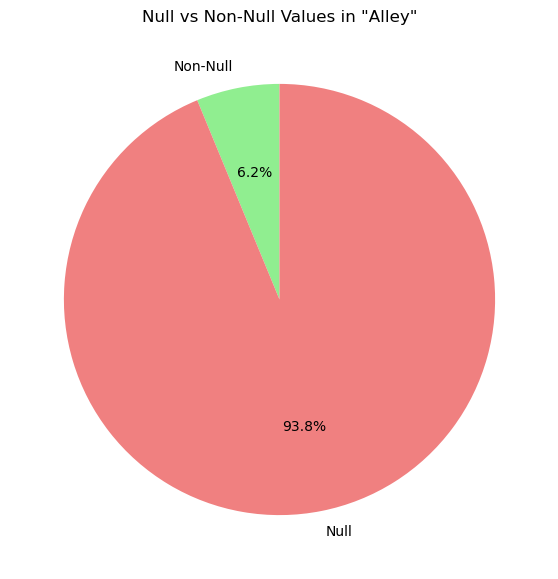

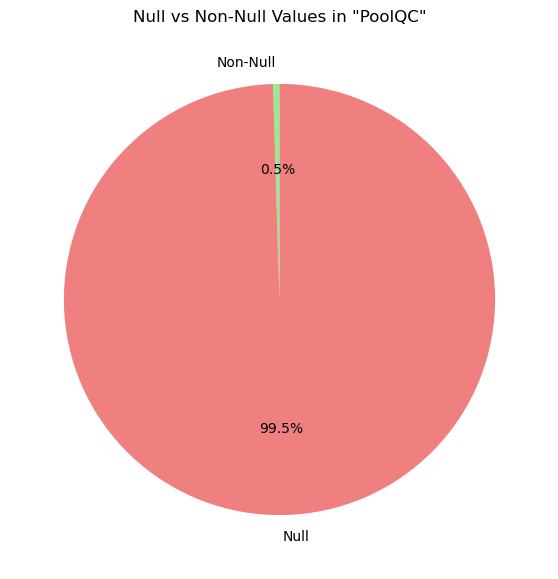

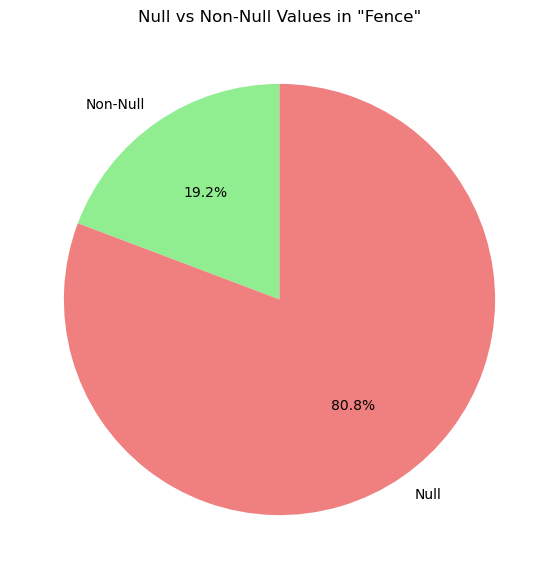

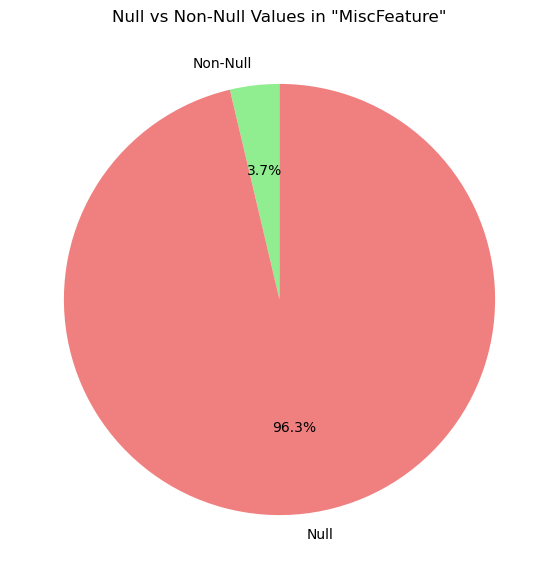

In [20]:
null_values = df1.isnull().sum()
null_drop = null_values[null_values > 876] #drop columns with more than 60% null values
for column in df1.columns:
    if df1[column].isnull().sum()>876:
        null_count = df1[column].isnull().sum()
        non_null_count = df1[column].notnull().sum()
        labels = ['Non-Null', 'Null']
        sizes = [non_null_count, null_count]
        colors = ['lightgreen', 'lightcoral']

        plt.figure(figsize=(7, 7))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
        plt.title(f'Null vs Non-Null Values in "{column}"')
        plt.show()



In [21]:
for column in df1.columns:
    if null_values[column]> 876:
        df1.drop([column], axis=1, inplace=True)
print("dropped columns")

dropped columns


In [22]:
df1.shape

(1460, 76)

In [23]:
def null(df):
    for column in df.columns:
        if df[column].dtype == np.number:
            df[column] = df[column].fillna(df[column].mean())
        elif df[column].dtype == 'object':
            df[column] = df[column].fillna((df[column].mode()[0]))
    return df
df1 = null(df1)
df1

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
2       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
3       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
4       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1455    AllPub    Inside       Gtl      Gilbert       Norm       Norm   
1456    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1457    AllPub    Inside       Gtl      Crawfor       Norm       Norm   
1458    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1459    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0        1Fam     2Story            7            5       2003          2003   
1        1Fam     1Story            6            8       1976          1976   
2        1Fam     2Story            7            5       2001          2002   
3        1Fam     2Story            7            5       1915          1970   
4        1Fam     2Story            8            5       2000          2000   
...       ...        ...          ...          ...        ...           ...   
1455     1Fam     2Story            6            5       1999          2000   
1456     1Fam     1Story            6            6       1978          1988   
1457     1Fam     2Story            7            9       1941          2006   
1458     1Fam     1Story            5            6       1950          1996   
1459     1Fam     1Story            5            6       1965          1965   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0        Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
1        Gable  CompShg     MetalSd     MetalSd    BrkFace         0.0   
2        Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
3        Gable  CompShg     Wd Sdng     Wd Shng    BrkFace         0.0   
4        Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   
...        ...      ...         ...         ...        ...         ...   
1455     Gable  CompShg     VinylSd     VinylSd    BrkFace         0.0   
1456     Gable  CompShg     Plywood     Plywood      Stone       119.0   
1457     Gable  CompShg     CemntBd     CmentBd    BrkFace         0.0   
1458       Hip  CompShg     MetalSd     MetalSd    BrkFace         0.0   
1459     Gable  CompShg     HdBoard     HdBoard    BrkFace         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           Gd        TA      PConc       Gd       TA           No   
1           TA        TA     CBlock       Gd       TA           Gd   
2           Gd        TA      PConc       Gd       TA           Mn   
3           TA        TA     BrkTil       TA       Gd         

In [24]:
df1.isnull().sum().sum()

0

**Handling Outliers**

In [26]:
numeric_columns = df1.select_dtypes(include=[np.number]).columns
outlier_cols=[]
for column in numeric_columns:
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lf = Q1 - 1.5 * IQR
    uf = Q3 + 1.5 * IQR
    if (df1[column] < lf).any() or (df1[column] > uf).any():
            outlier_cols.append(column)
        

In [27]:
outlier_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

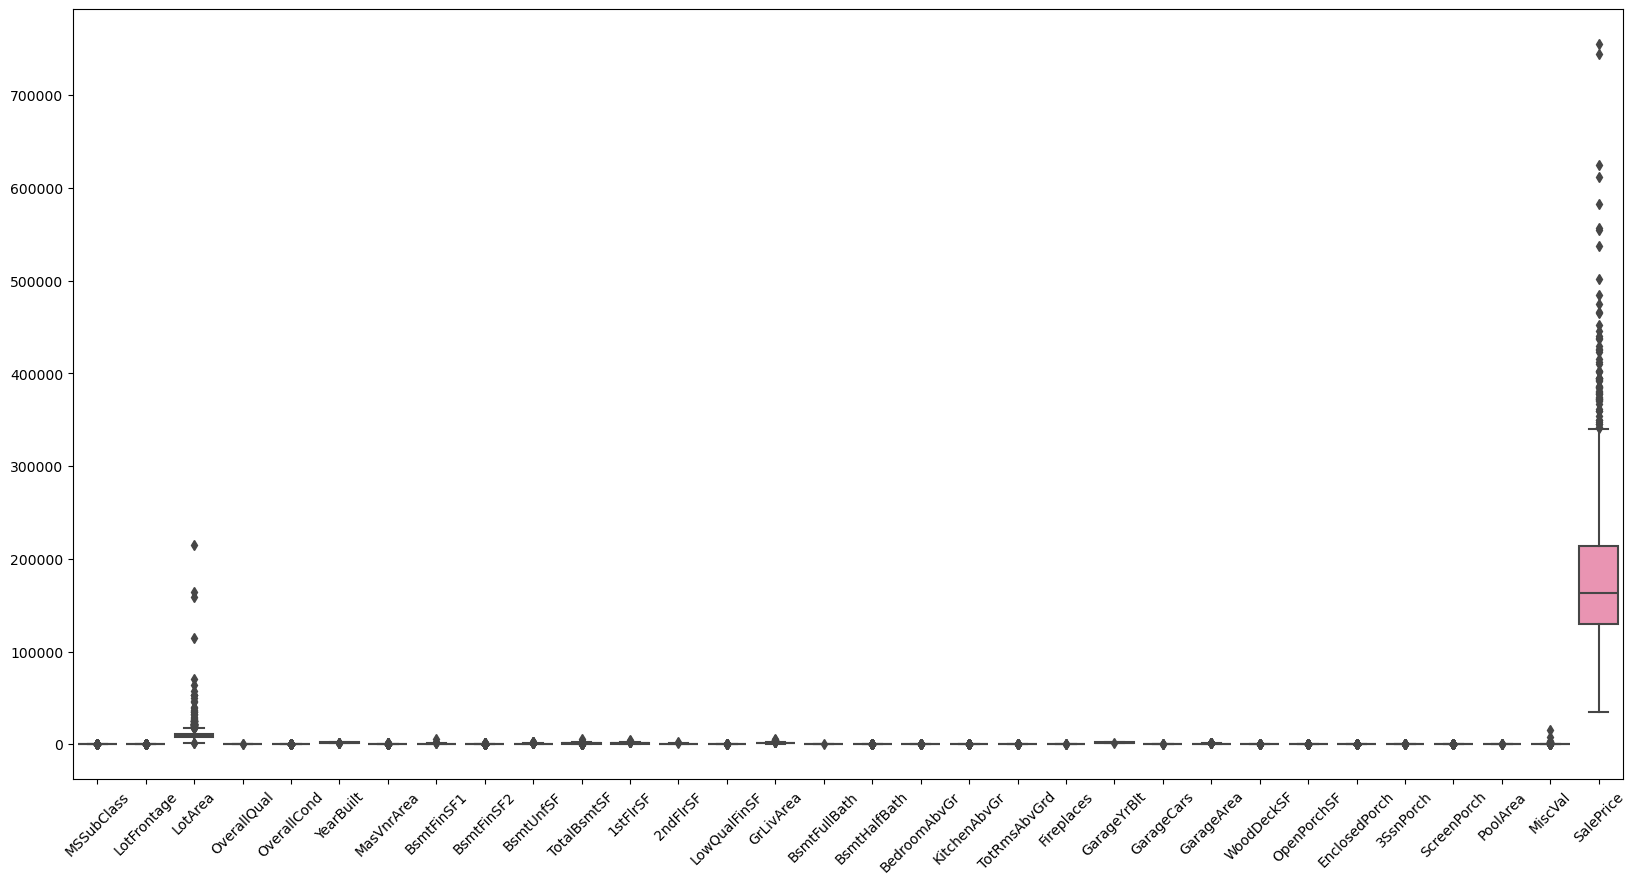

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df1[outlier_cols])
plt.xticks(rotation=45)
plt.show()

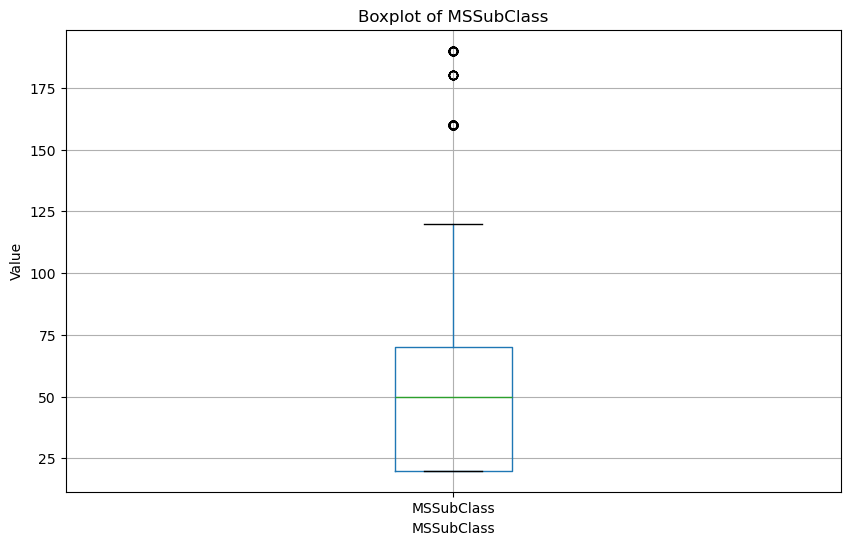

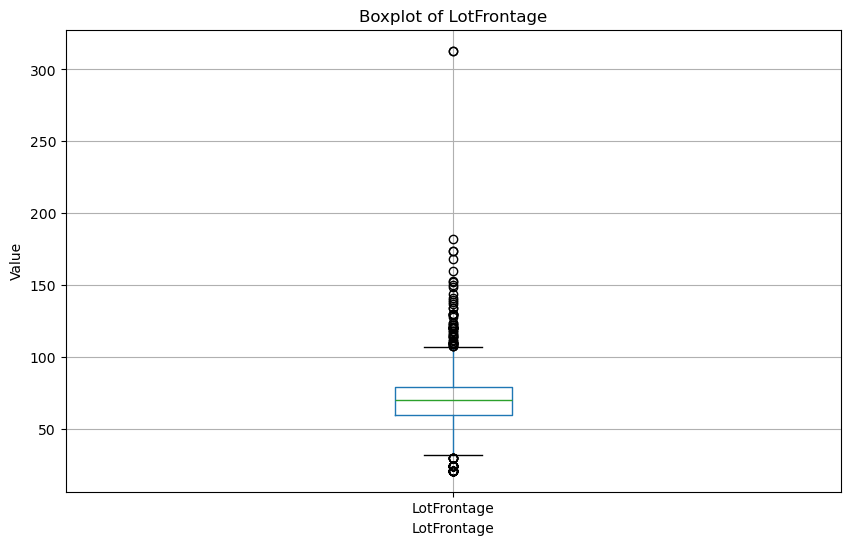

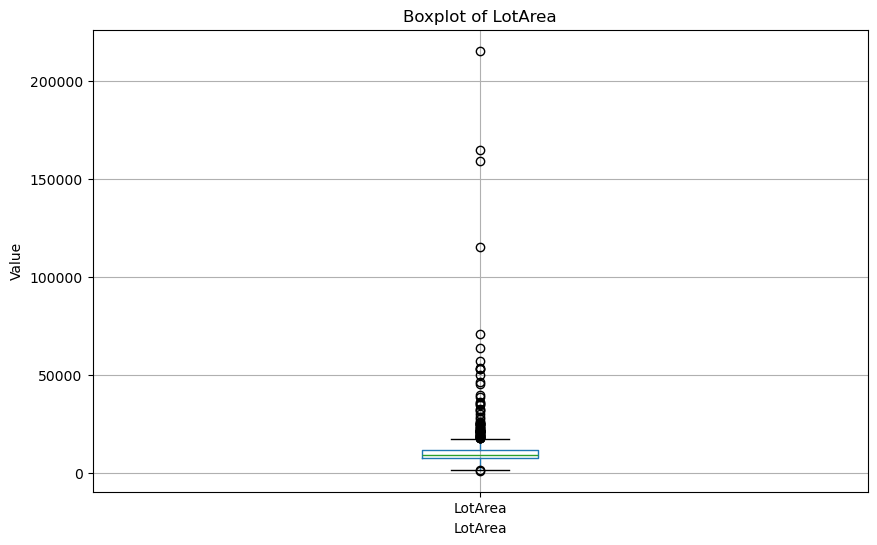

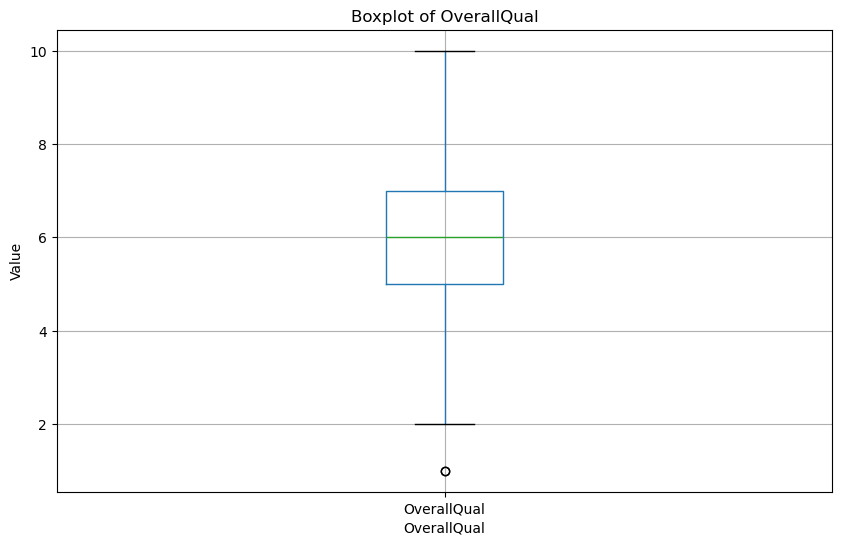

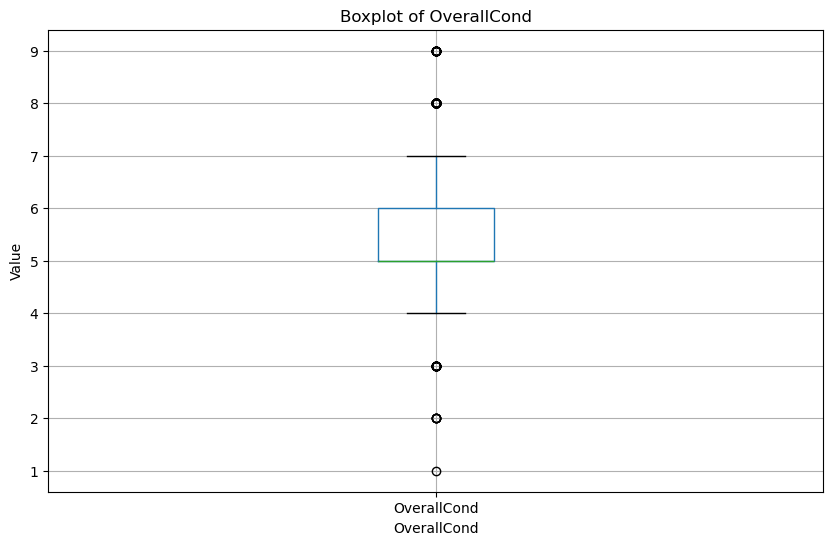

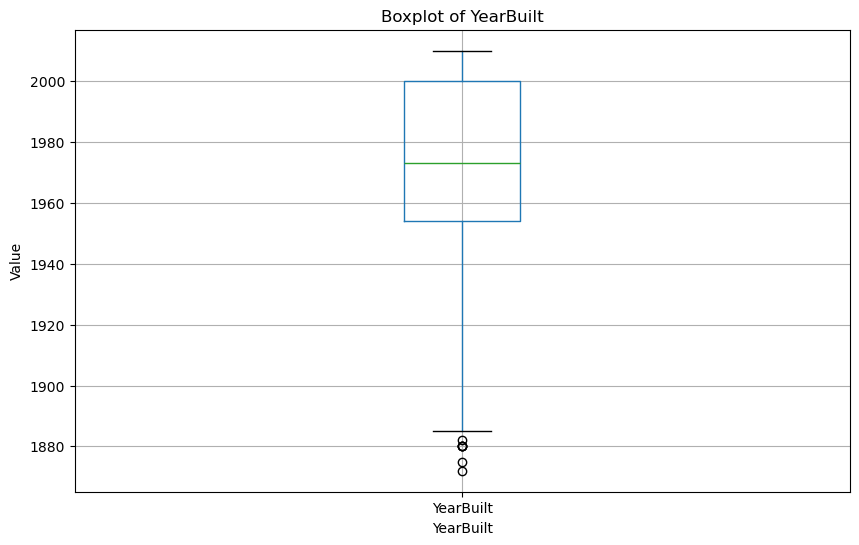

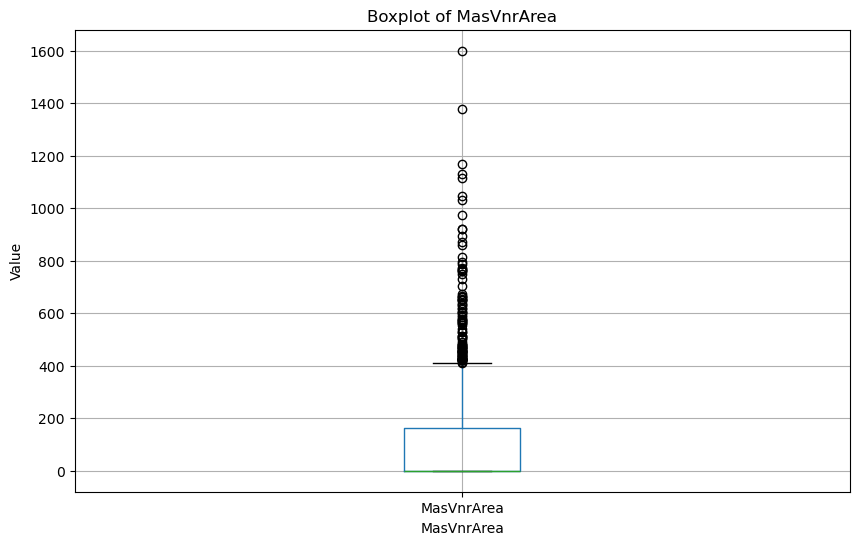

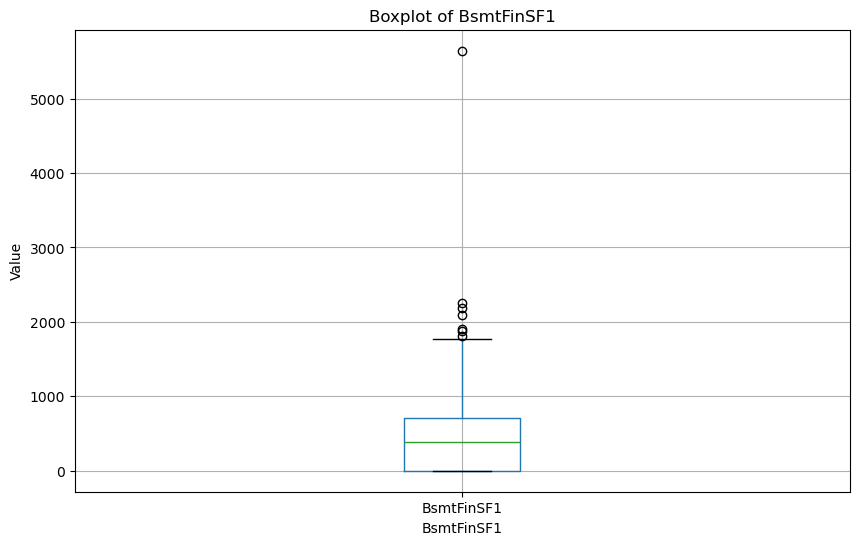

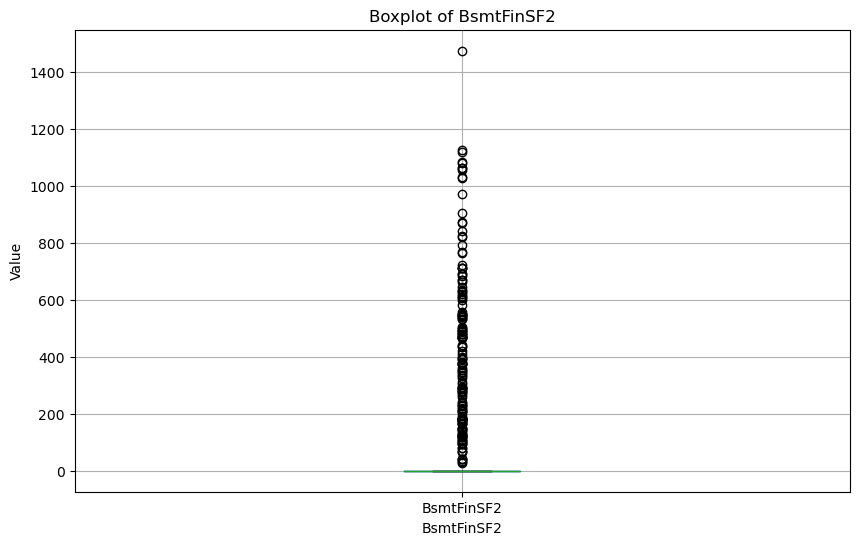

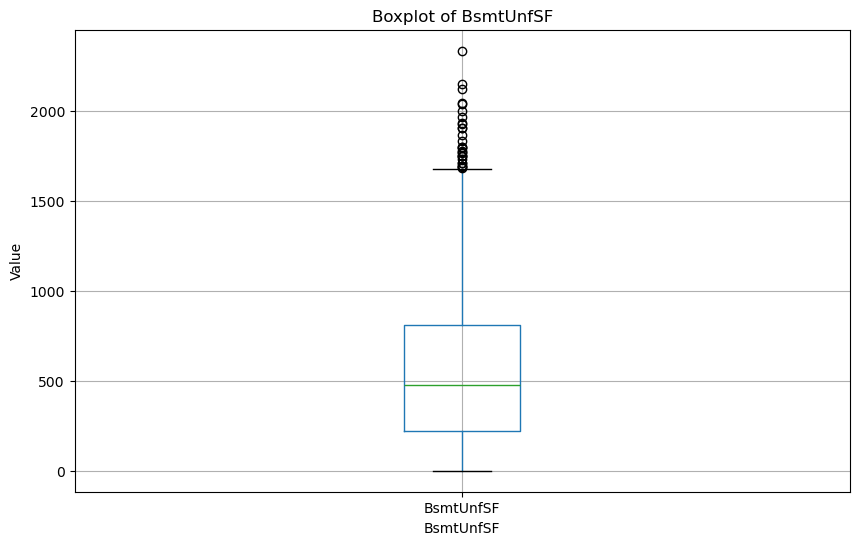

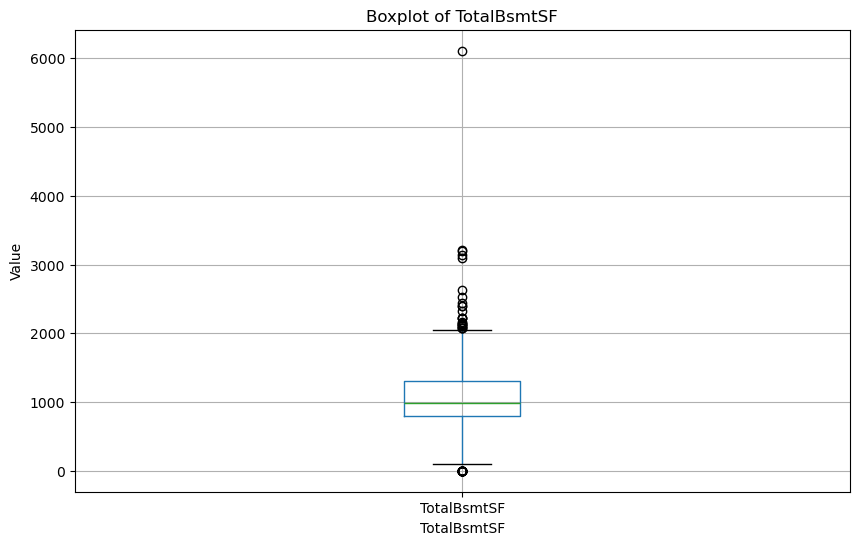

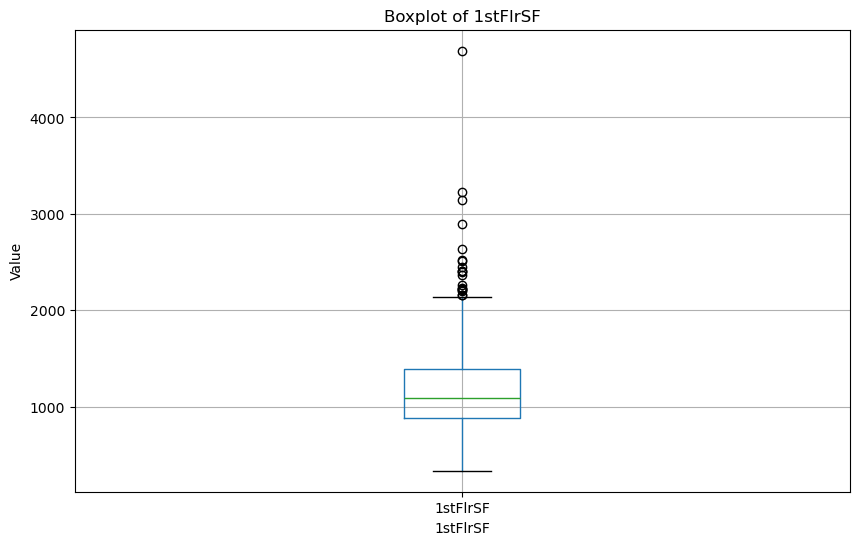

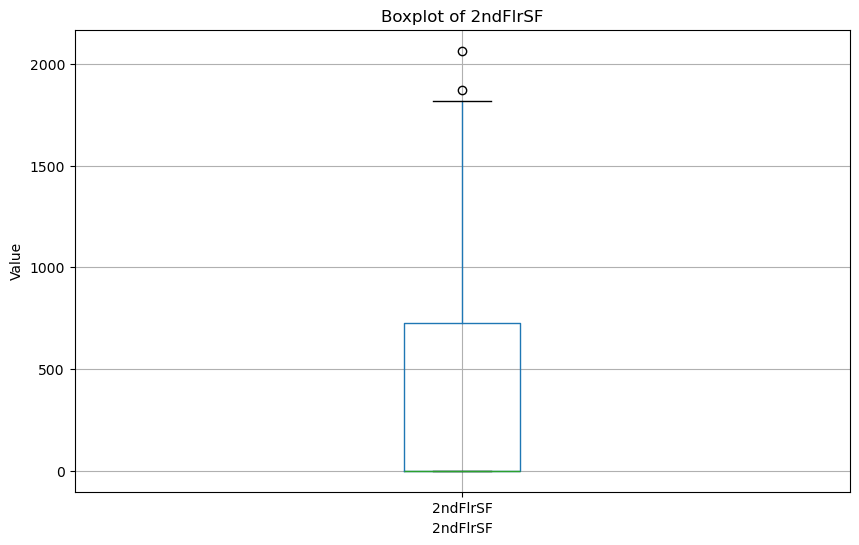

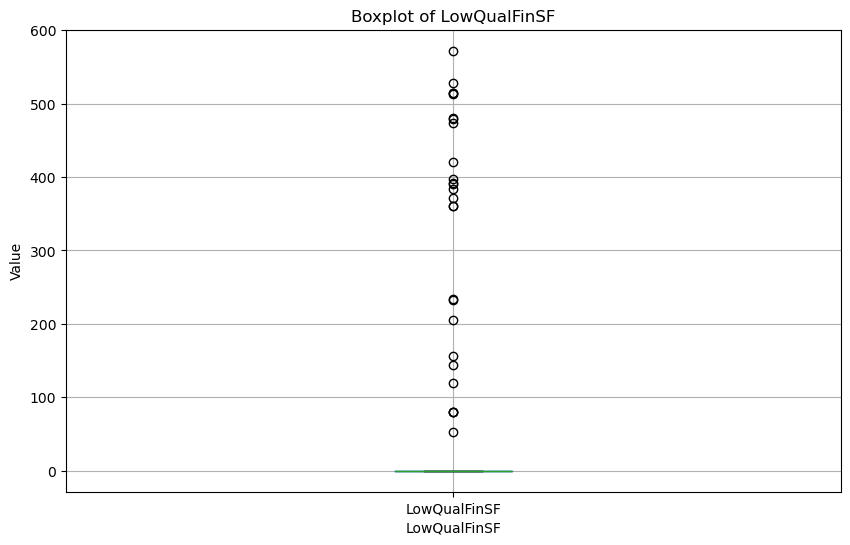

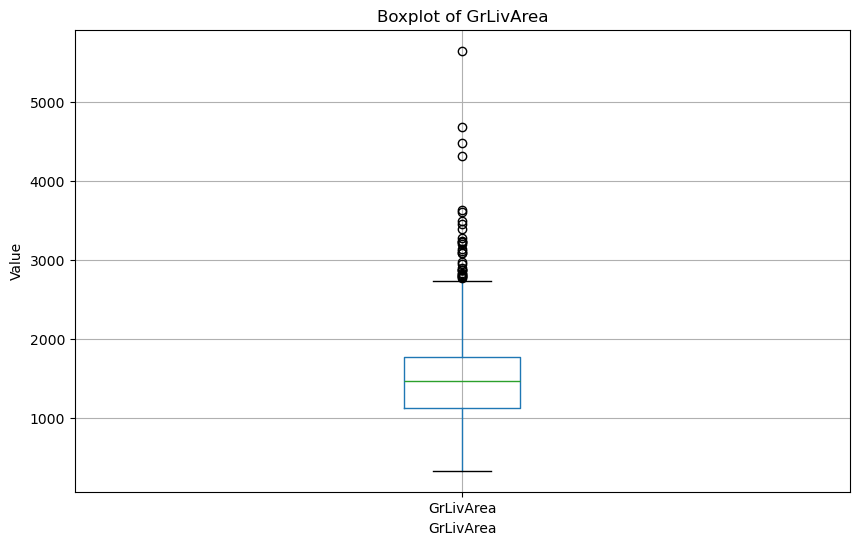

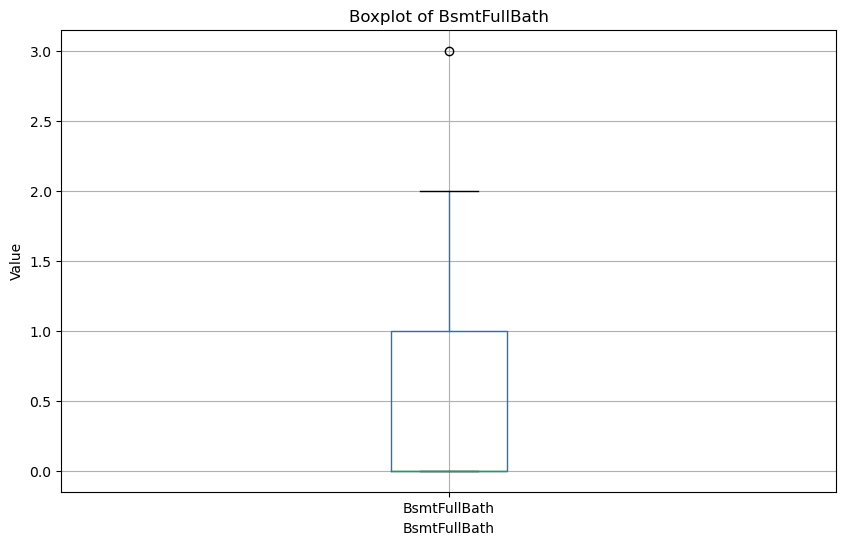

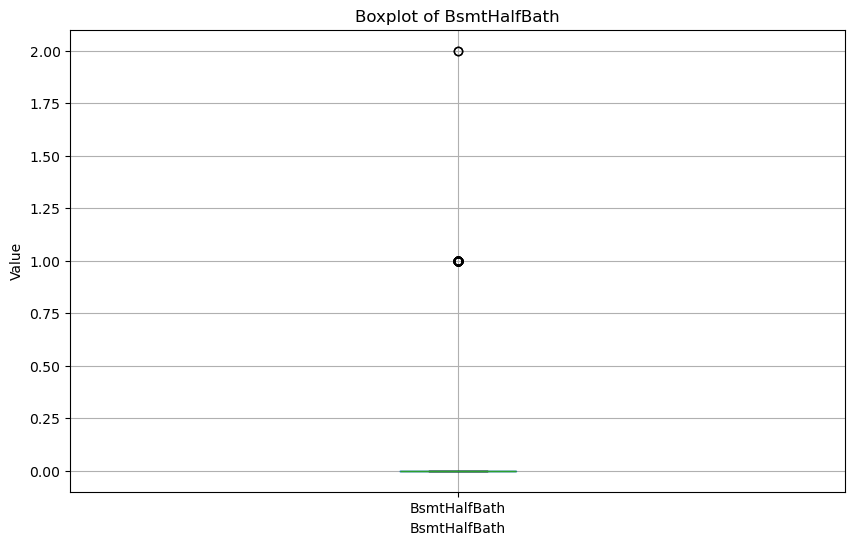

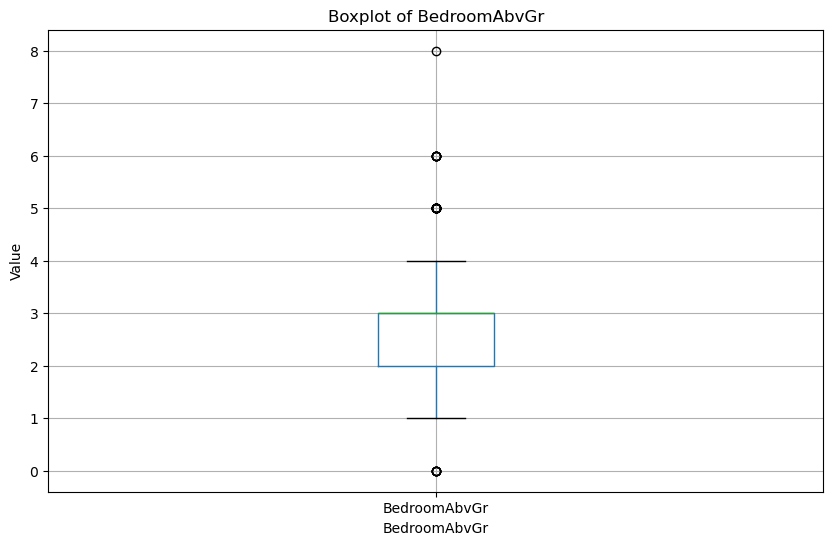

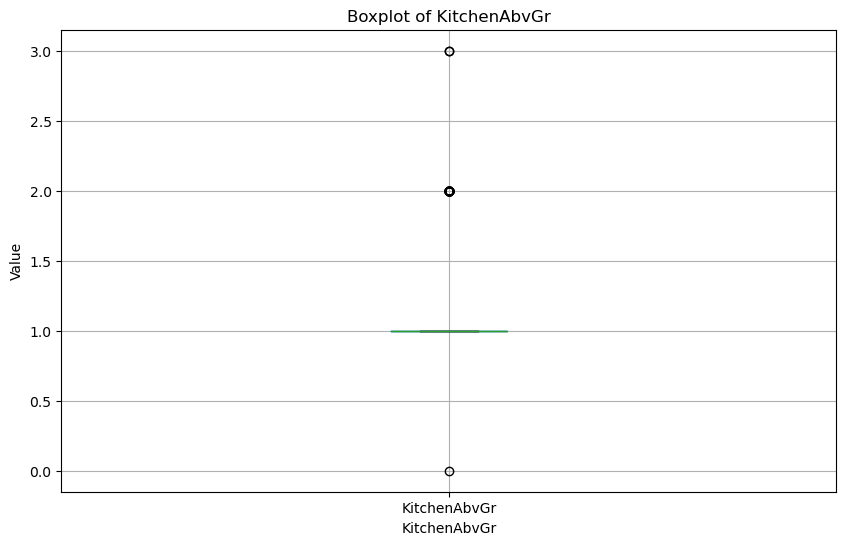

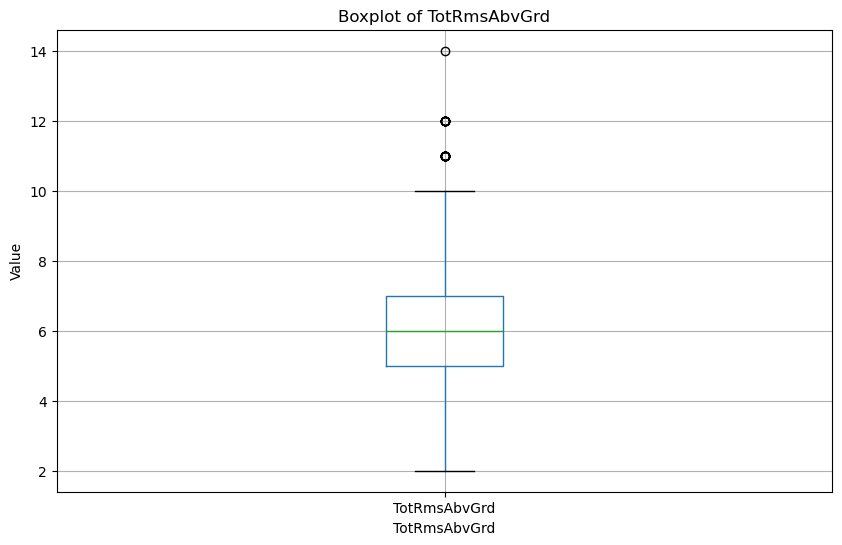

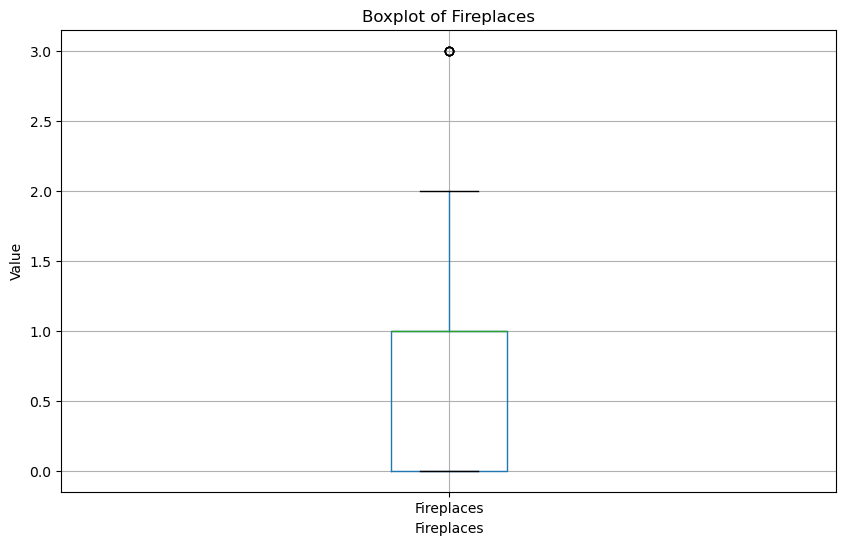

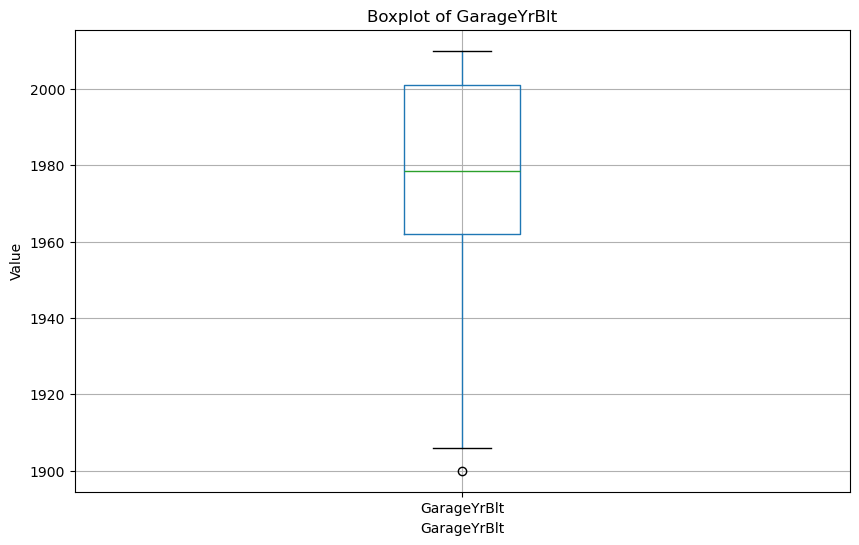

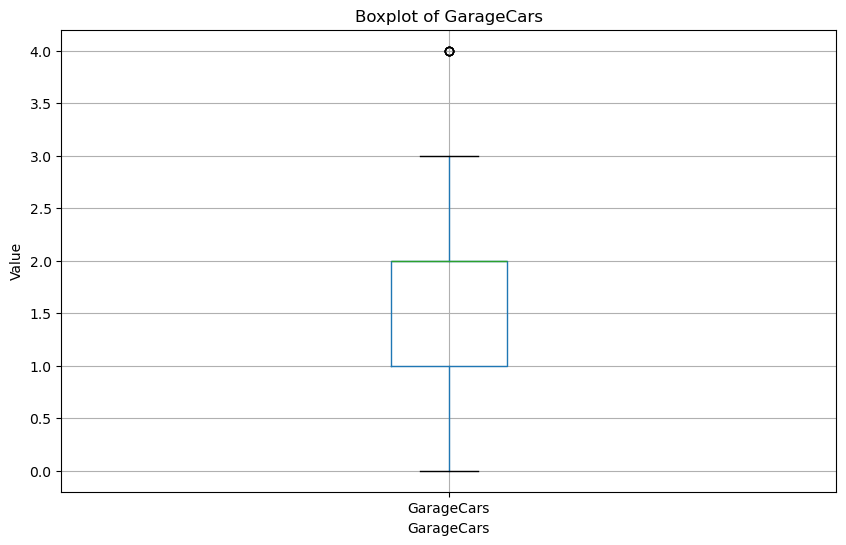

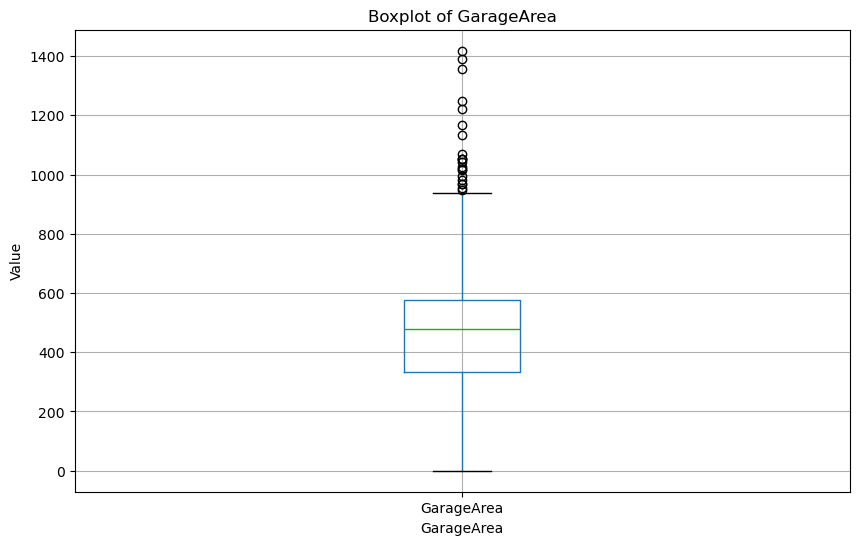

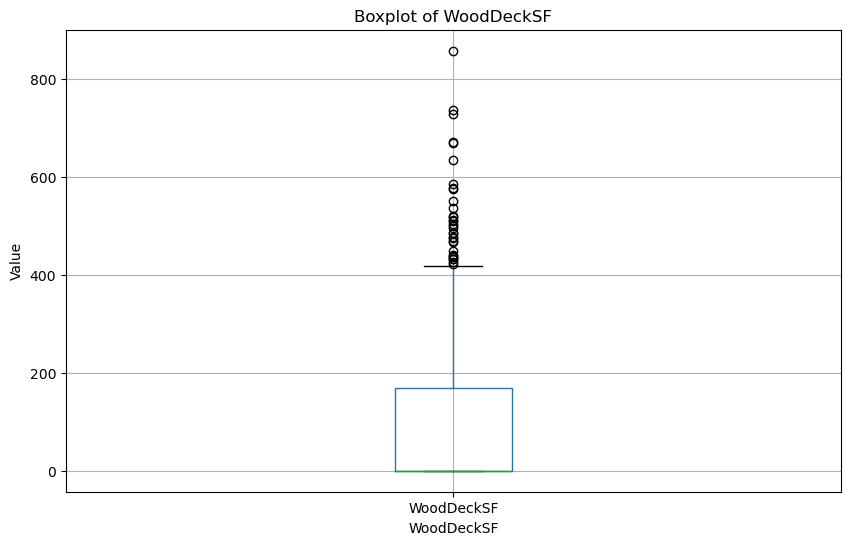

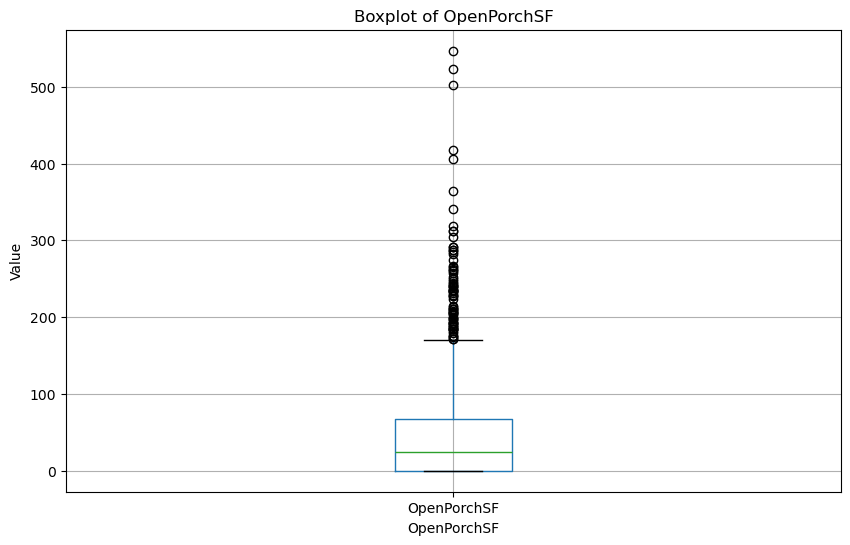

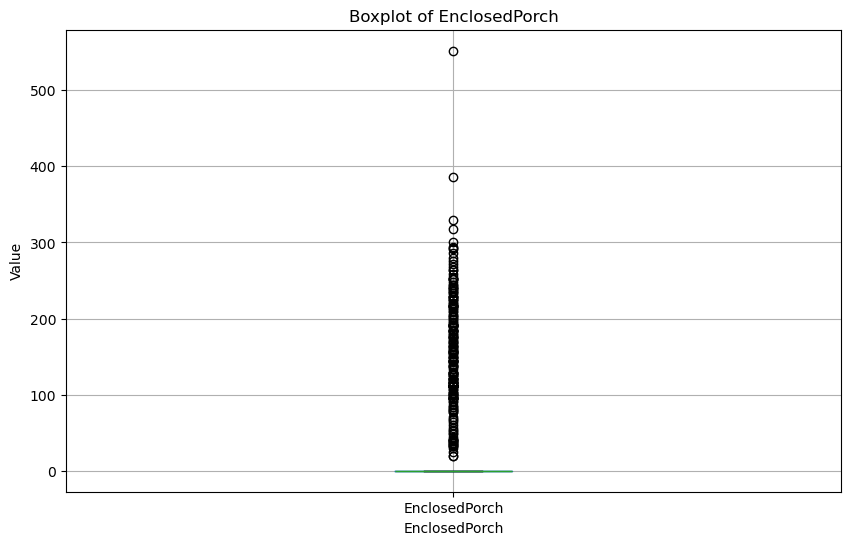

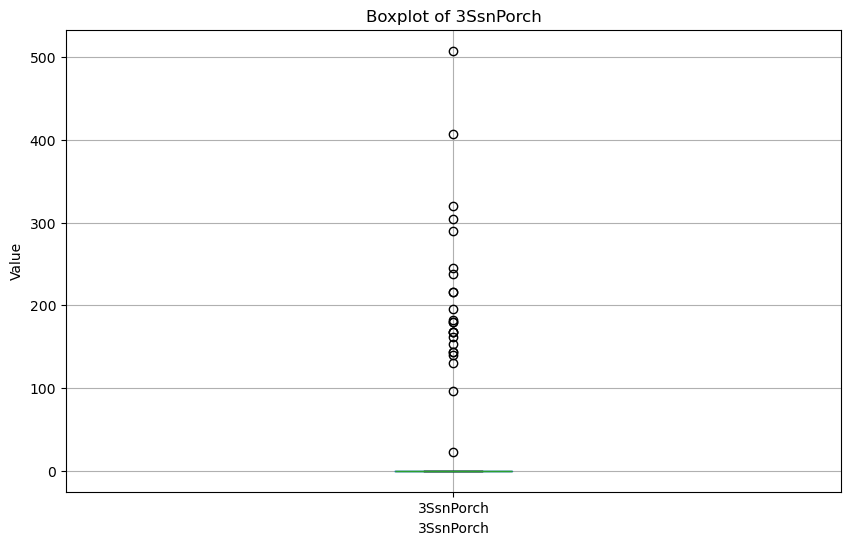

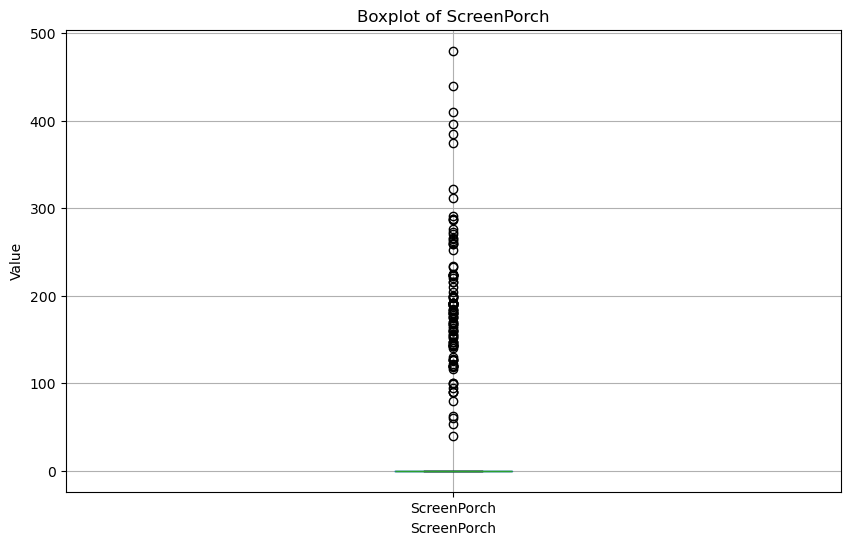

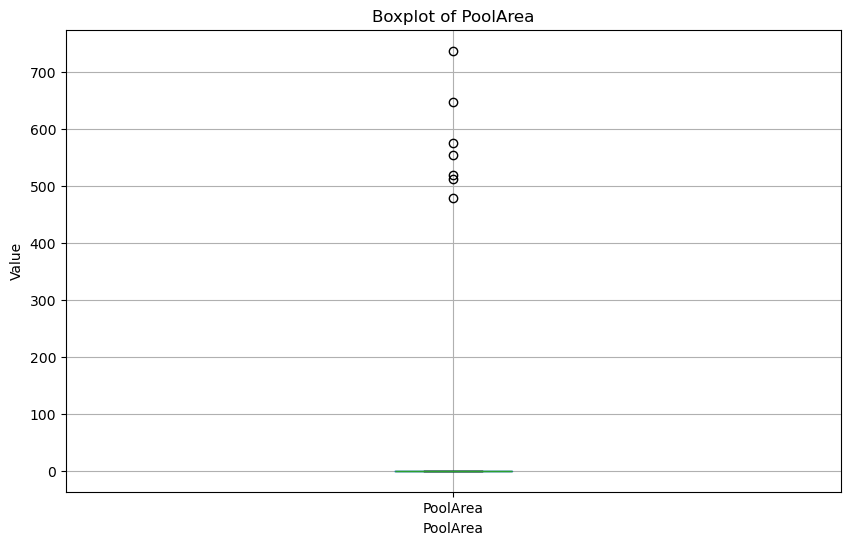

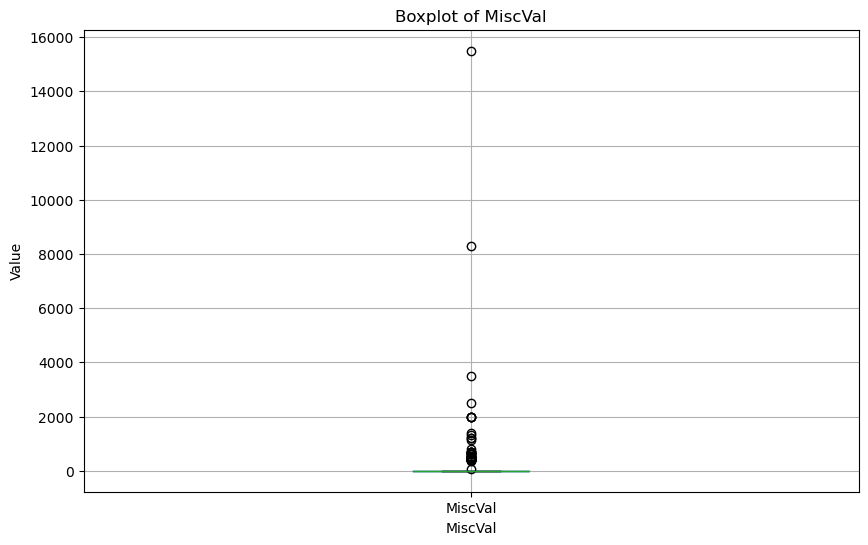

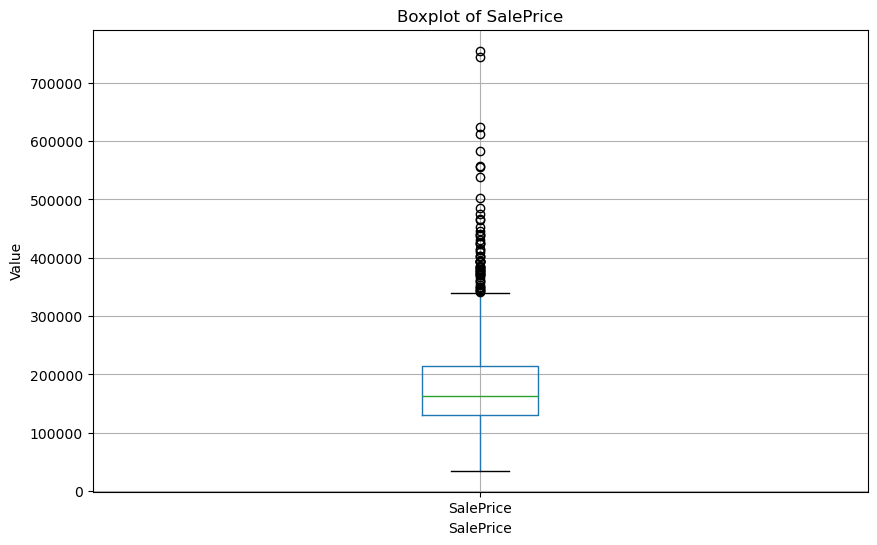

In [29]:
for column in outlier_cols:
    plt.figure(figsize=(10, 6))
    df1.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.show()

In [30]:
def outliers_capping(df):
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lf = Q1 - 1.5 * IQR
        uf = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lf, lf, np.where(df[column] > uf, uf, df[column]))
    return df

df1 = outliers_capping(df1)


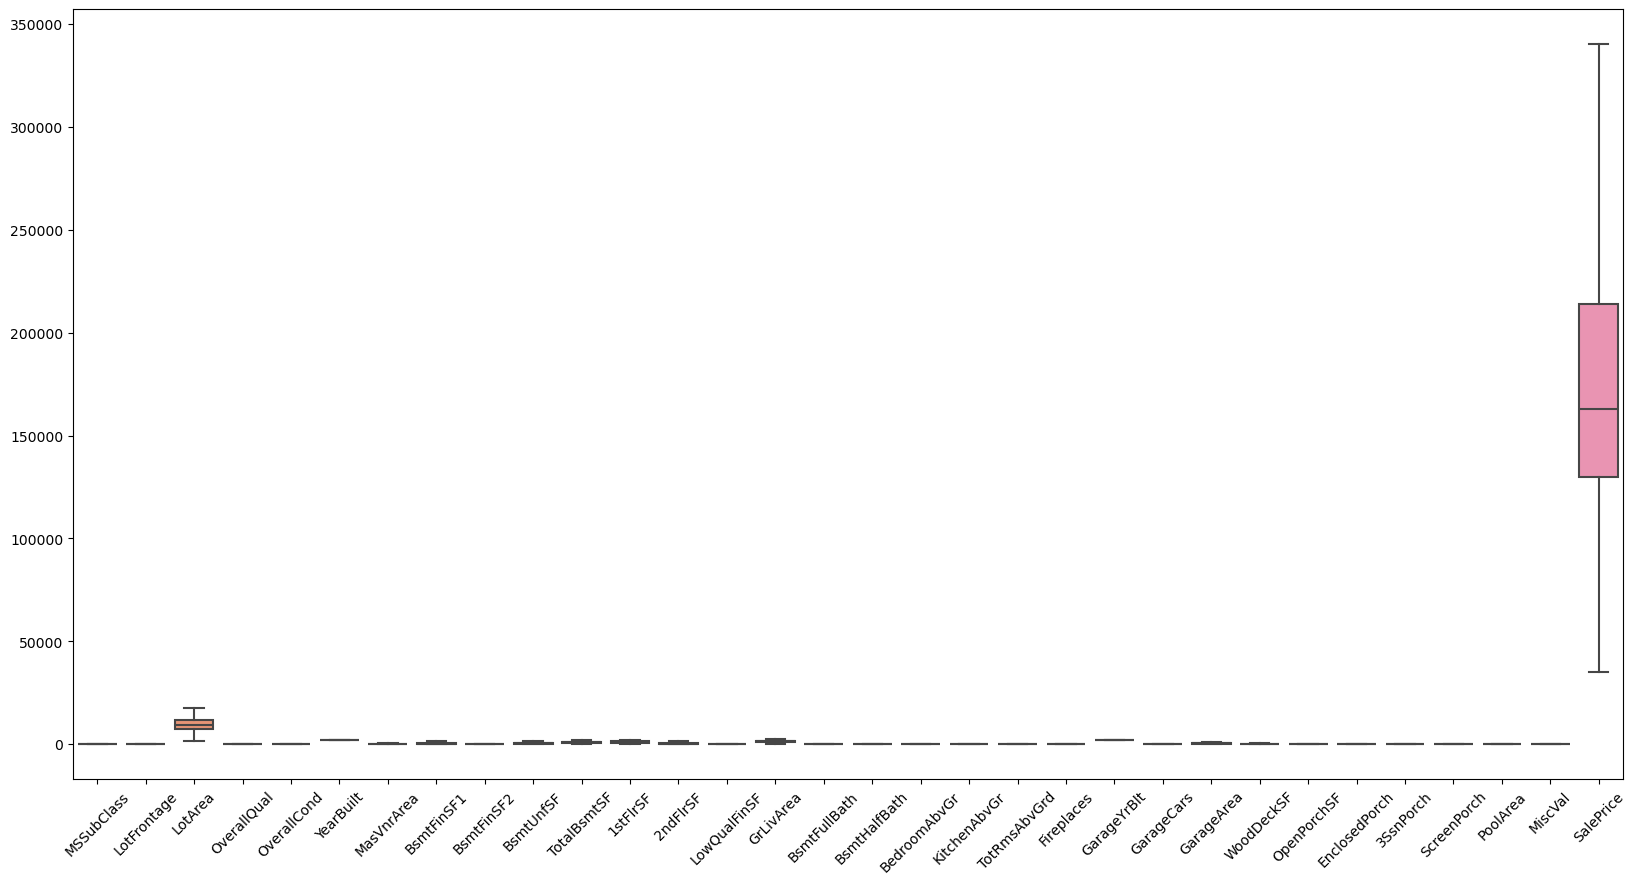

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df1[outlier_cols])
plt.xticks(rotation=45)
plt.show()

**Label Encoding**

In [33]:
categorical_columns = df1.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


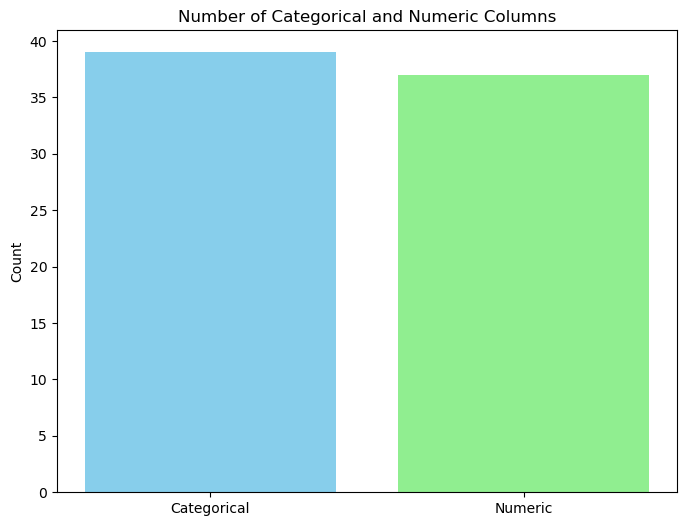

In [34]:
categorical_count = len(df1.select_dtypes(include=['object', 'category']).columns)
numeric_count = len(df1.select_dtypes(include=['int64', 'float64']).columns)

column_types = pd.DataFrame({
    'Column Type': ['Categorical', 'Numeric'],
    'Count': [categorical_count, numeric_count]
})

plt.figure(figsize=(8, 6))
plt.bar(column_types['Column Type'], column_types['Count'], color=['skyblue', 'lightgreen'])
plt.title('Number of Categorical and Numeric Columns')
plt.ylabel('Count')
plt.show()


In [35]:
label_encoders = {}

for column in df1.columns:
    if df1[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df1[column] = label_encoders[column].fit_transform(df1[column])

df1.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0        60.0         3         65.0   8450.0       1         3            3   
1        20.0         3         80.0   9600.0       1         3            3   
2        60.0         3         68.0  11250.0       1         0            3   
3        70.0         3         60.0   9550.0       1         0            3   
4        60.0         3         84.0  14260.0       1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0             5           2           2   
1          0          2          0            24           1           2   
2          0          4          0             5           2           2   
3          0          0          0             6           2           2   
4          0          2          0            15           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         0           5          7.0          5.0     2003.0        2003.0   
1         0           2          6.0          7.5     1976.0        1976.0   
2         0           5          7.0          5.0     2001.0        2002.0   
3         0           5          7.0          5.0     1915.0        1970.0   
4         0           5          8.0          5.0     2000.0        2000.0   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         1           12           13           1       196.0   
1          1         1            8            8           1         0.0   
2          1         1           12           13           1       162.0   
3          1         1           13           15           1         0.0   
4          1         1           12           13           1       350.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          2          4           2         2         3             3   
1          3          4           1         2         3             1   
2          2          4           2         2         3             2   
3          3          4           0         3         1             3   
4          2          4           2         2         3             0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             2       706.0             5         0.0      150.0        856.0   
1             0       978.0             5         0.0      284.0       1262.0   
2             2       486.0             5         0.0      434.0        920.0   
3             0       216.0             5         0.0      540.0        756.0   
4             2       655.0             5         0.0      490.0       1145.0   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        1          0           1           4     856.0     854.0   
1        1          0           1           4    1262.0       0.0   
2        1          0           1           4     920.0     866.0   
3        1          2           1           4     961.0     756.0   
4        1          0           1           4    1145.0    1053.0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0           0.0     1710.0           1.0           0.0       2.0       1.0   
1           0.0     1262.0           0.0           0.0       2.0       0.0   
2           0.0     1786.0           1.0           0.0       2.0       1.0   
3           0.0     1717.0           1.0           0.0       1.0       0.0   
4           0.0     2198.0           1.0           0.0       2.0       1.0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0           3.0           1.0            2           8.0           6   
1           3.0           1.0            3           6.0           6   
2           3.0           1.0            2           6.0           6   
3           3.0           1.0            

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

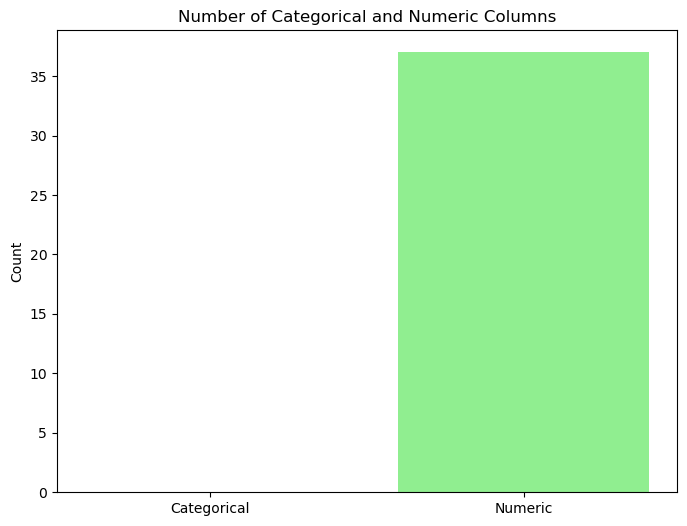

In [37]:
categorical_count = len(df1.select_dtypes(include=['object', 'category']).columns)
numeric_count = len(df1.select_dtypes(include=['int64', 'float64']).columns)

column_types = pd.DataFrame({
    'Column Type': ['Categorical', 'Numeric'],
    'Count': [categorical_count, numeric_count]
})

plt.figure(figsize=(8, 6))
plt.bar(column_types['Column Type'], column_types['Count'], color=['skyblue', 'lightgreen'])
plt.title('Number of Categorical and Numeric Columns')
plt.ylabel('Count')
plt.show()

# Exploratory Data Analysis

**Hist Plot**

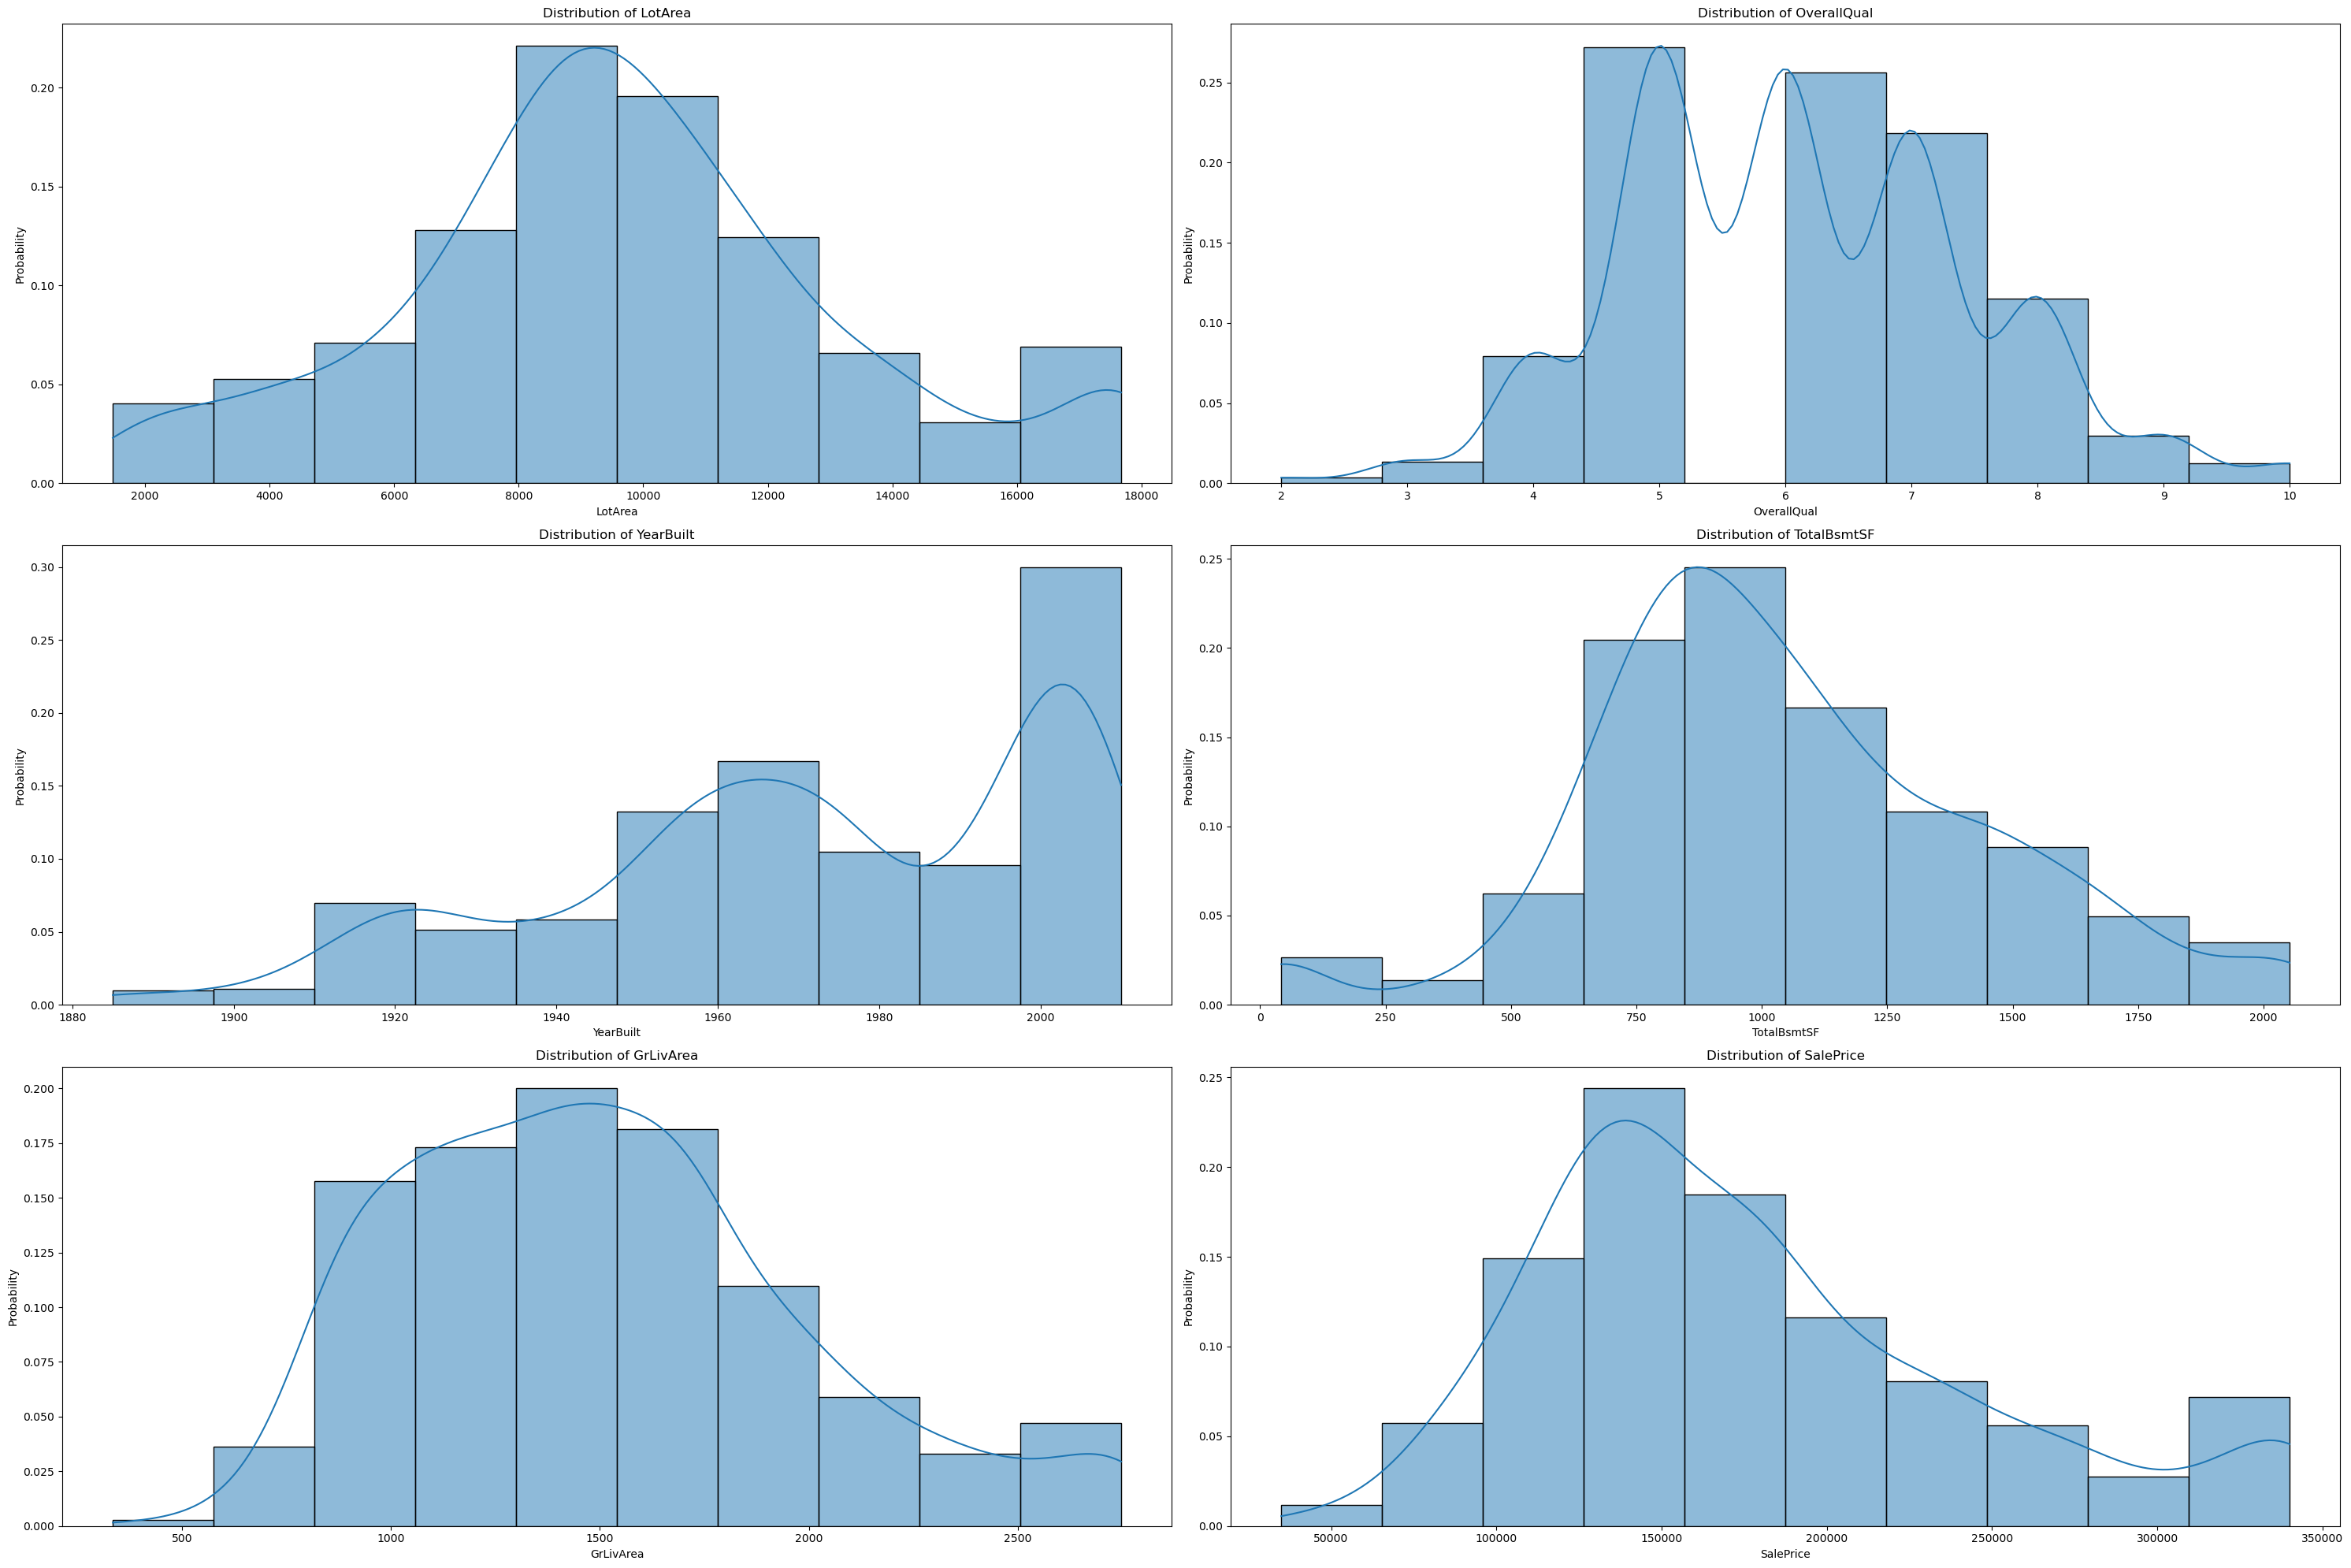

In [40]:
columns=  ['LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(data=df1, x=col, stat='probability', bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

**Line Plot**

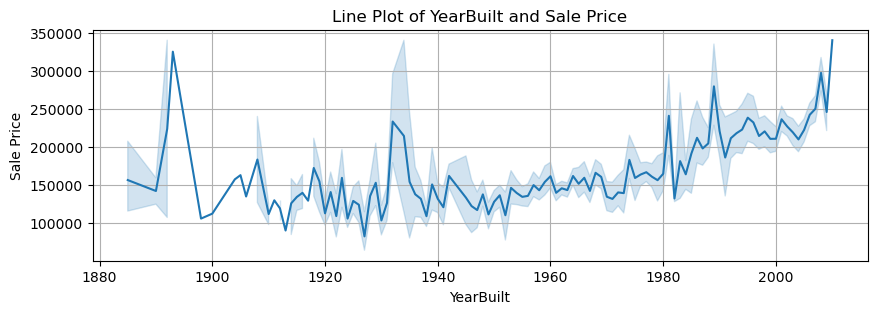

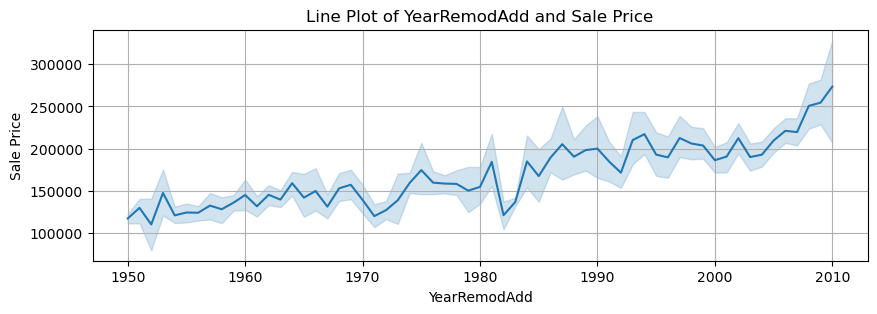

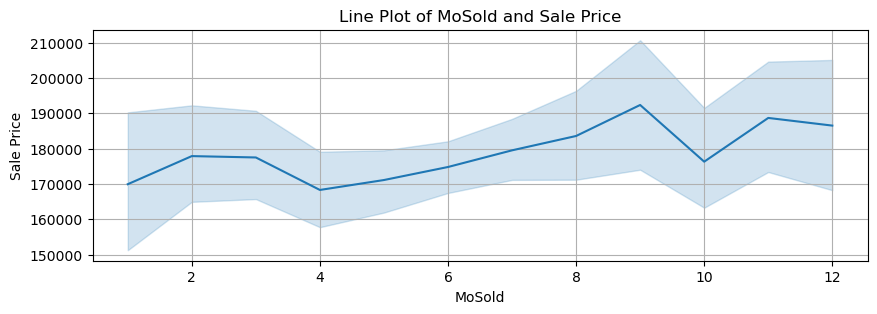

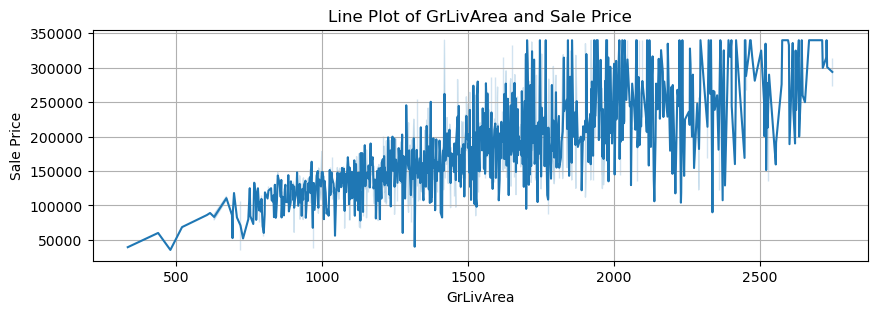

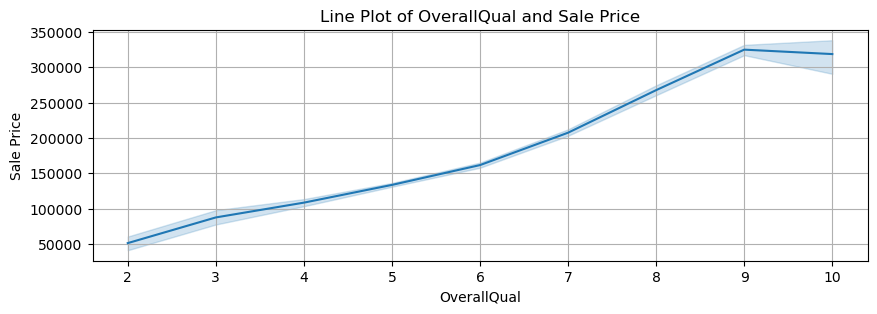

In [42]:
columns=['YearBuilt', 'YearRemodAdd', 'MoSold', 'GrLivArea', 'OverallQual']
for col in columns:
    plt.figure(figsize=(10, 3)) 
    sns.lineplot(x=col, y='SalePrice', data=df1)
    plt.title(f'Line Plot of {col} and Sale Price')
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    plt.grid(True)
    plt.show()

**Violin Plot**

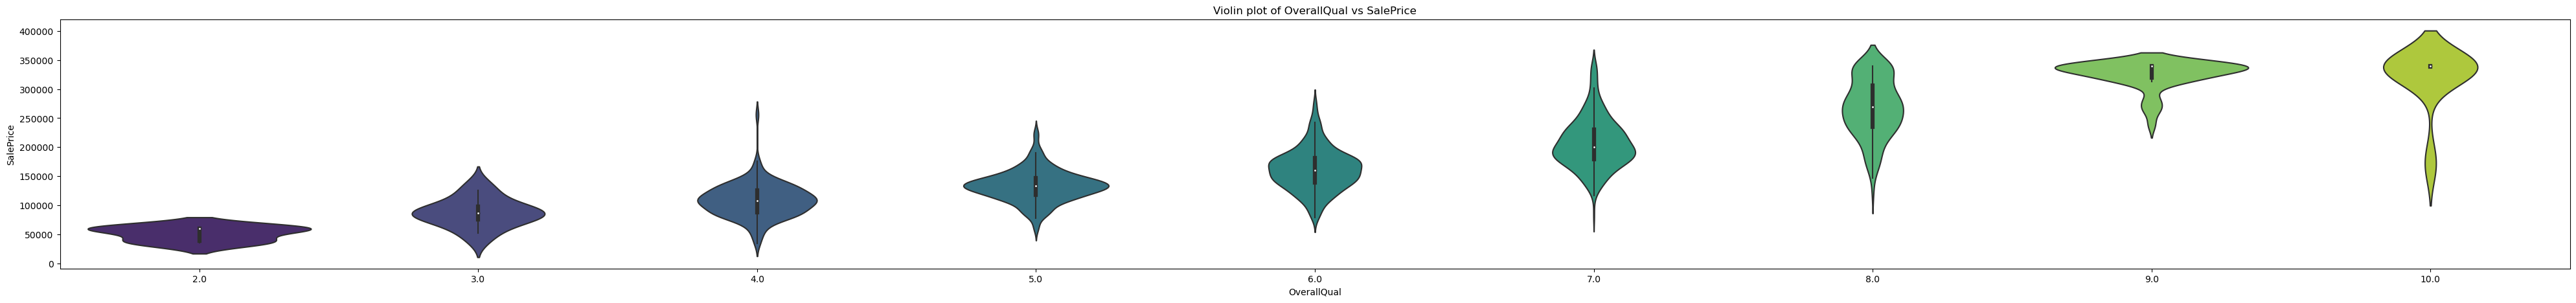

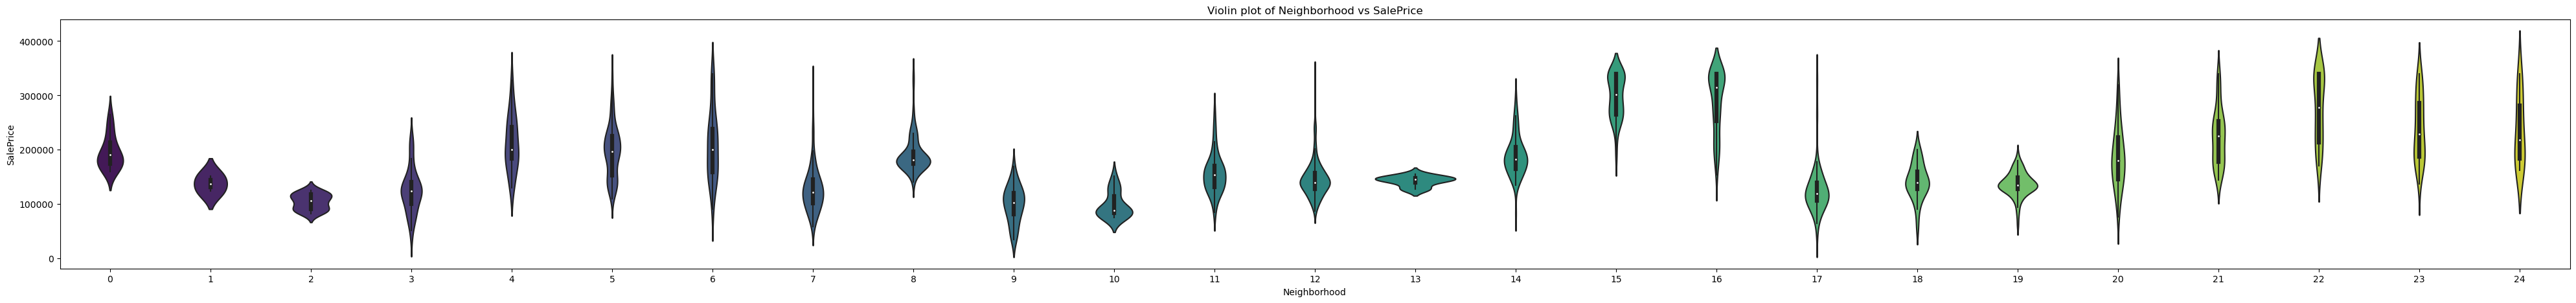

In [44]:
columns = ['OverallQual', 'Neighborhood' ]
for col in columns:
    plt.figure(figsize=(50, 5))
    sns.violinplot(x=col, y='SalePrice', data=df1, palette='viridis')
    
    plt.title(f'Violin plot of {col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

**Count Plot**

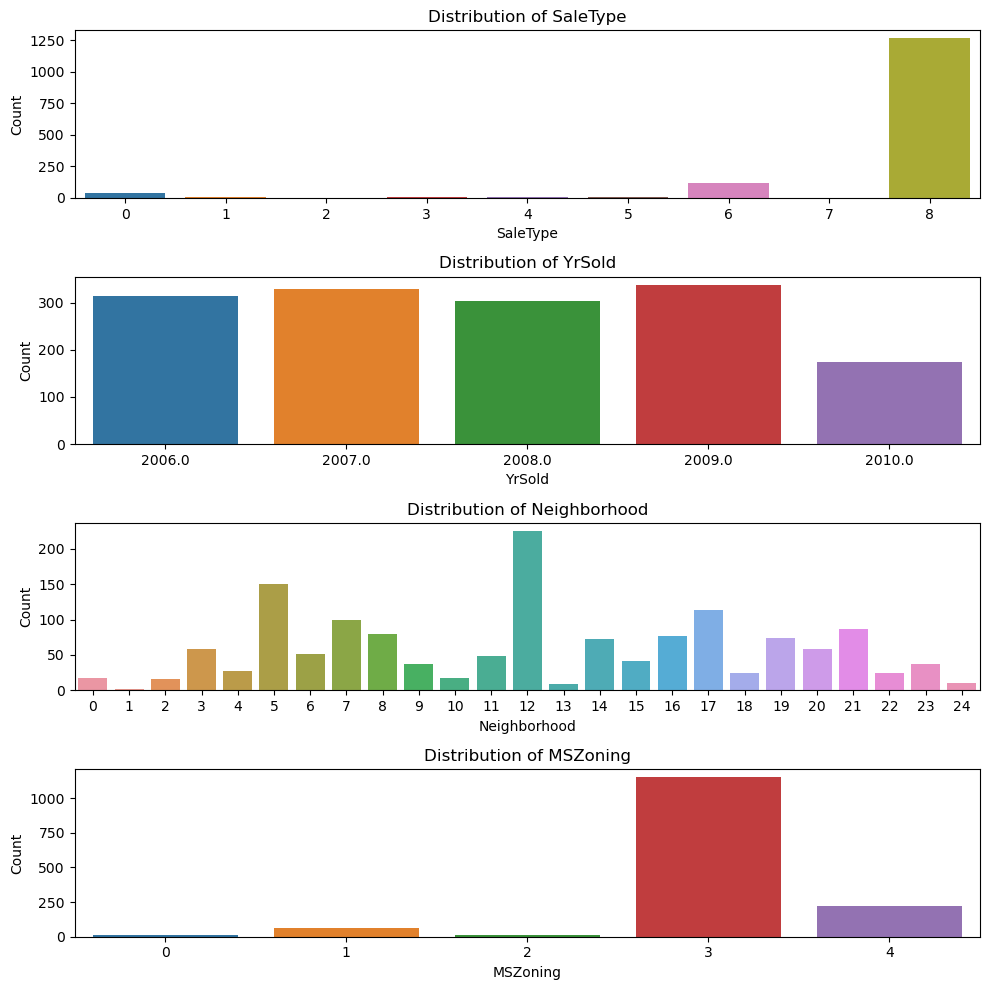

In [46]:
columns = ['SaleType', 'YrSold', 'Neighborhood', 'MSZoning']
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 10)) 
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.countplot(x=column, data=df1, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    

plt.tight_layout()
plt.show()

**3D Scatter Plot**

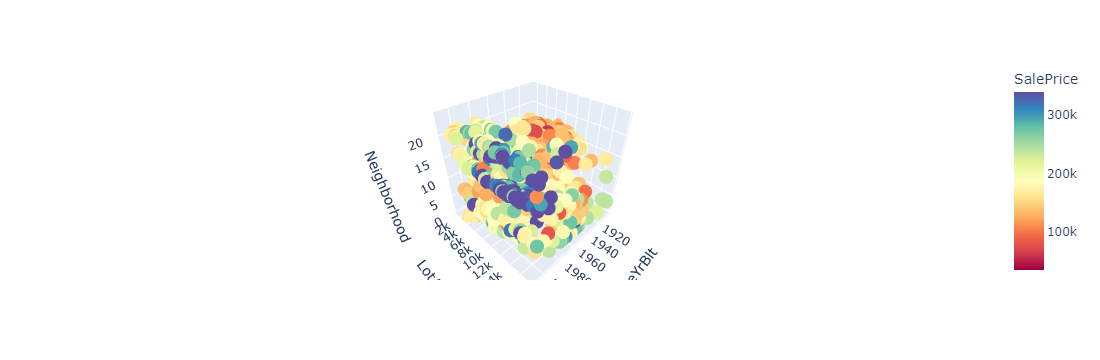

In [48]:
import plotly.express as px
fig = px.scatter_3d(df1, x='GarageYrBlt', y='LotArea', z='Neighborhood', color='SalePrice', color_continuous_scale=px.colors.diverging.Spectral)

fig.show()

**Heatmap**

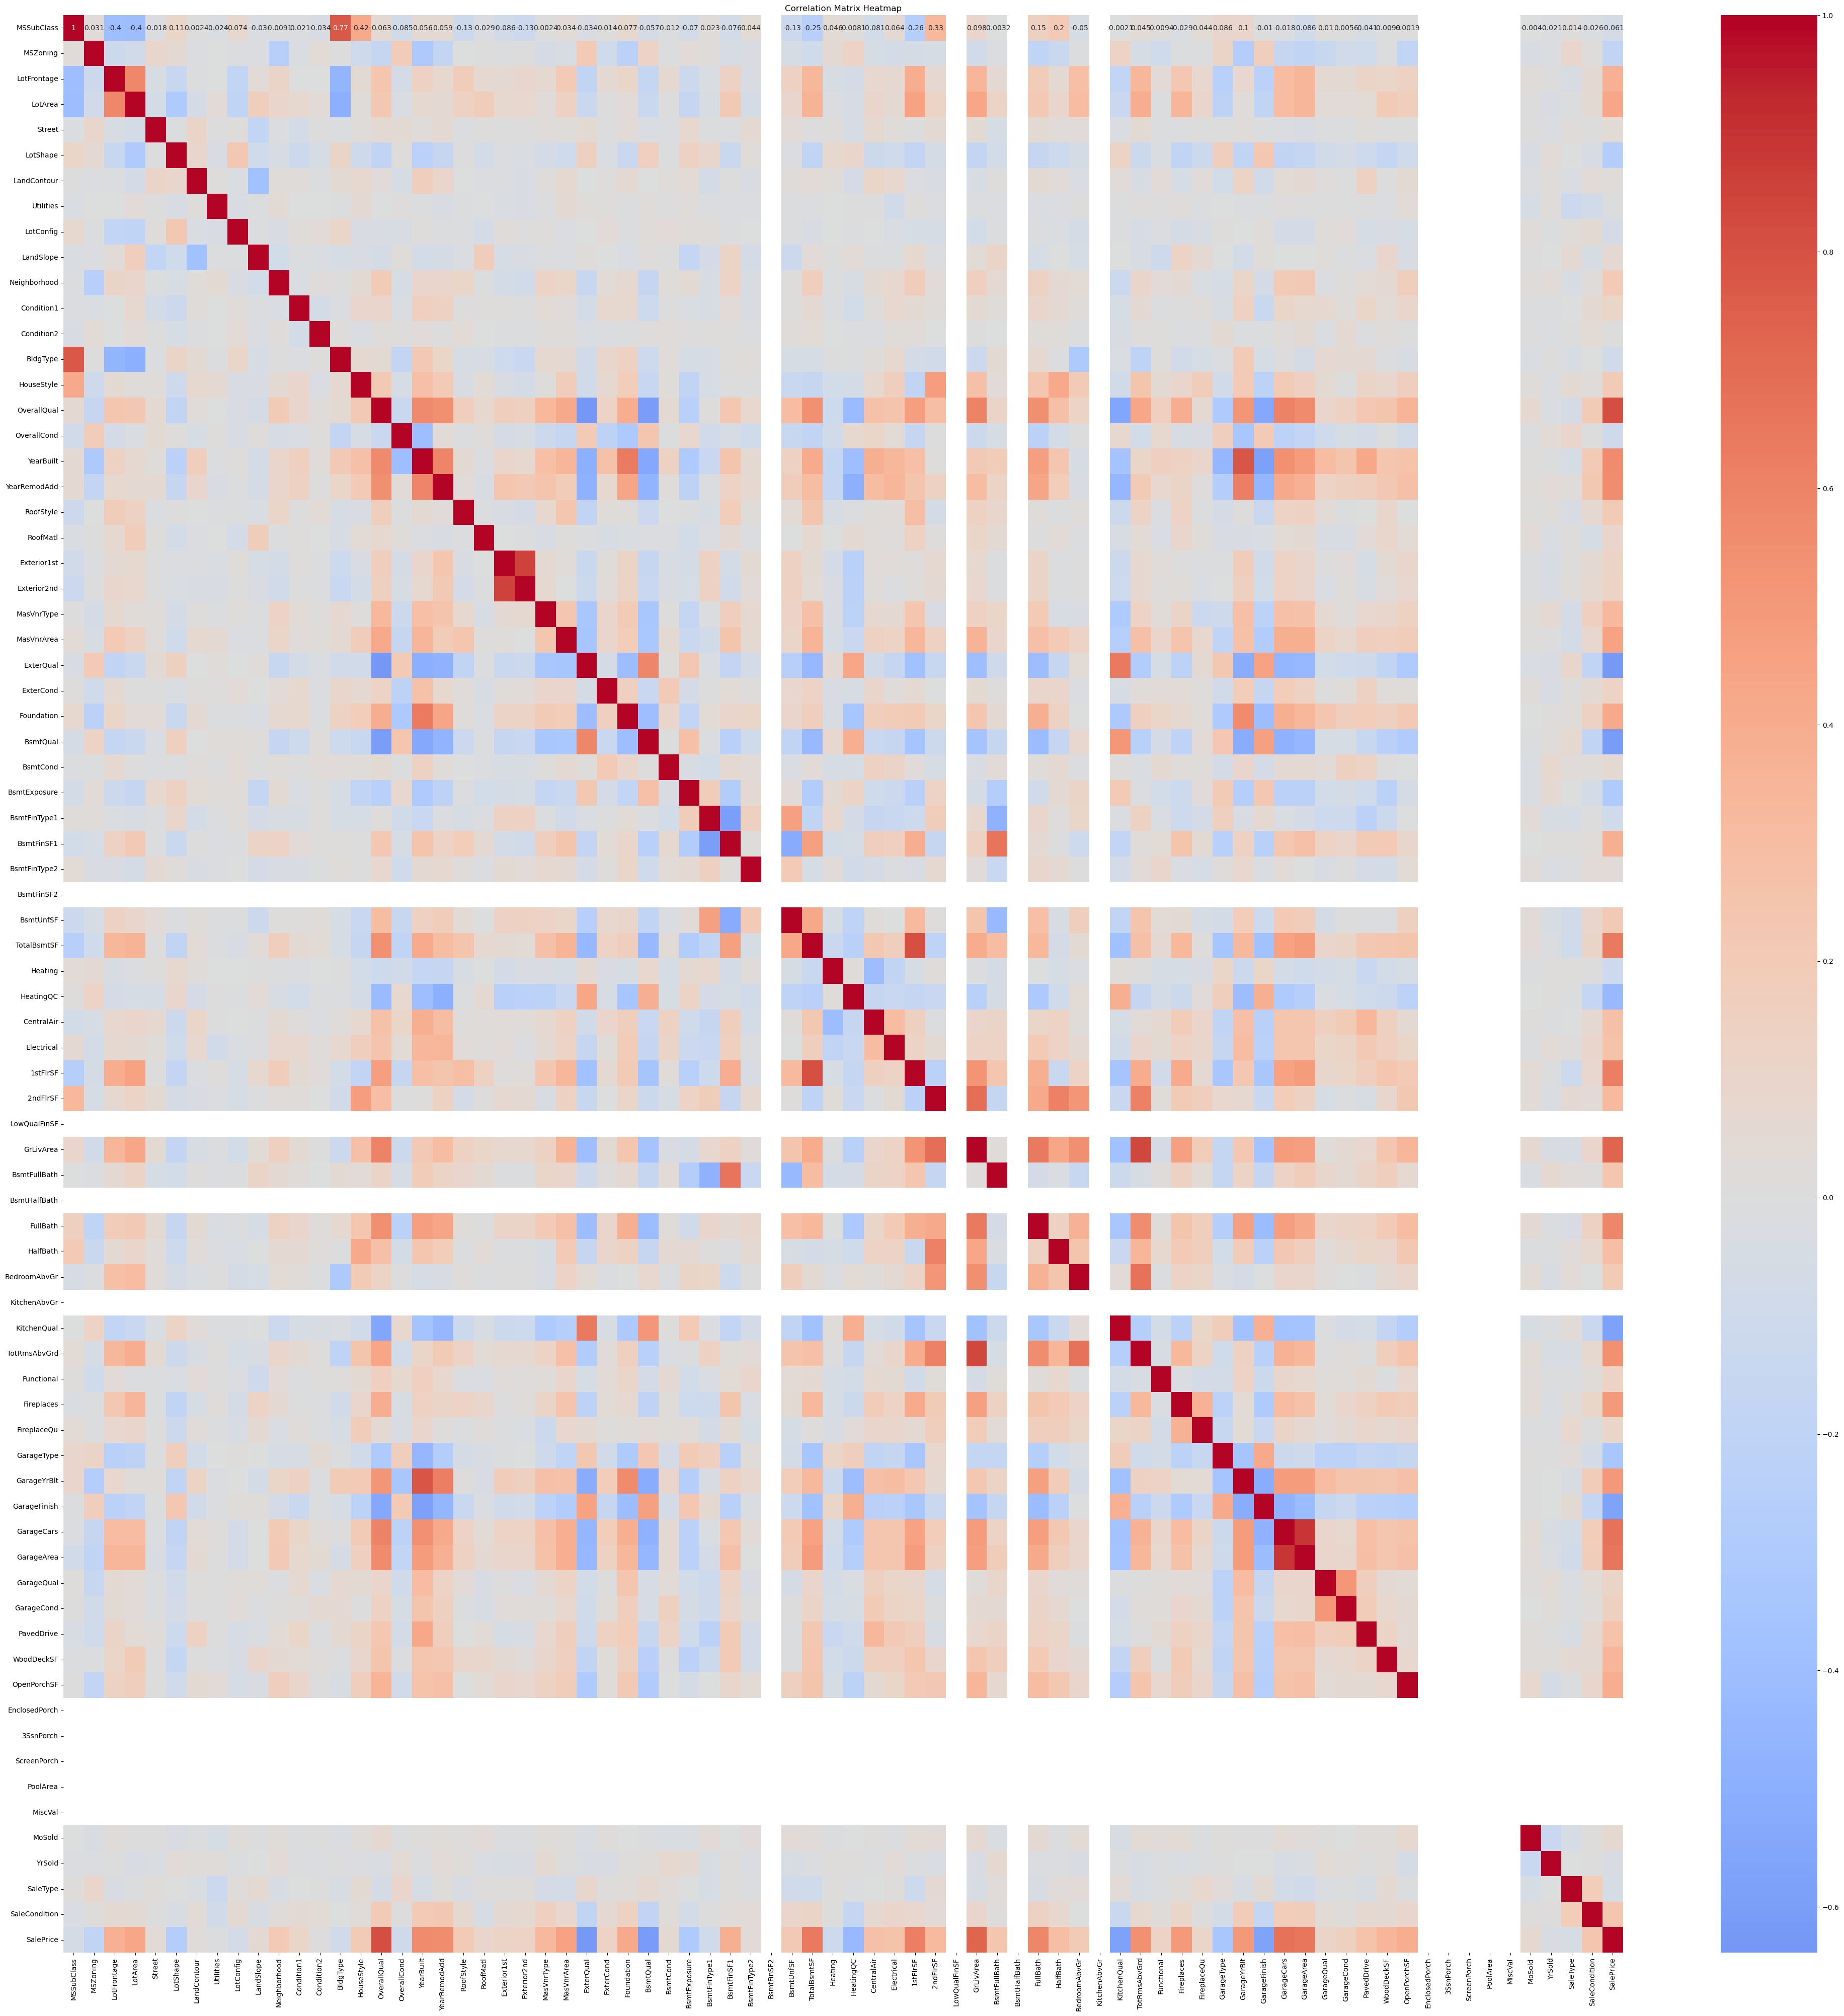

In [50]:
plt.figure(figsize=(50, 50))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [51]:
#deleting column due to presence of only one unique value
for column in df1.columns:
    unique_values = df1[column].unique()
    if len(unique_values)==1:
        print("dropped column: "f"{column}: {unique_values}")
        df1.drop([column], axis=1, inplace=True)

dropped column: BsmtFinSF2: [0.]
dropped column: LowQualFinSF: [0.]
dropped column: BsmtHalfBath: [0.]
dropped column: KitchenAbvGr: [1.]
dropped column: EnclosedPorch: [0.]
dropped column: 3SsnPorch: [0.]
dropped column: ScreenPorch: [0.]
dropped column: PoolArea: [0.]
dropped column: MiscVal: [0.]


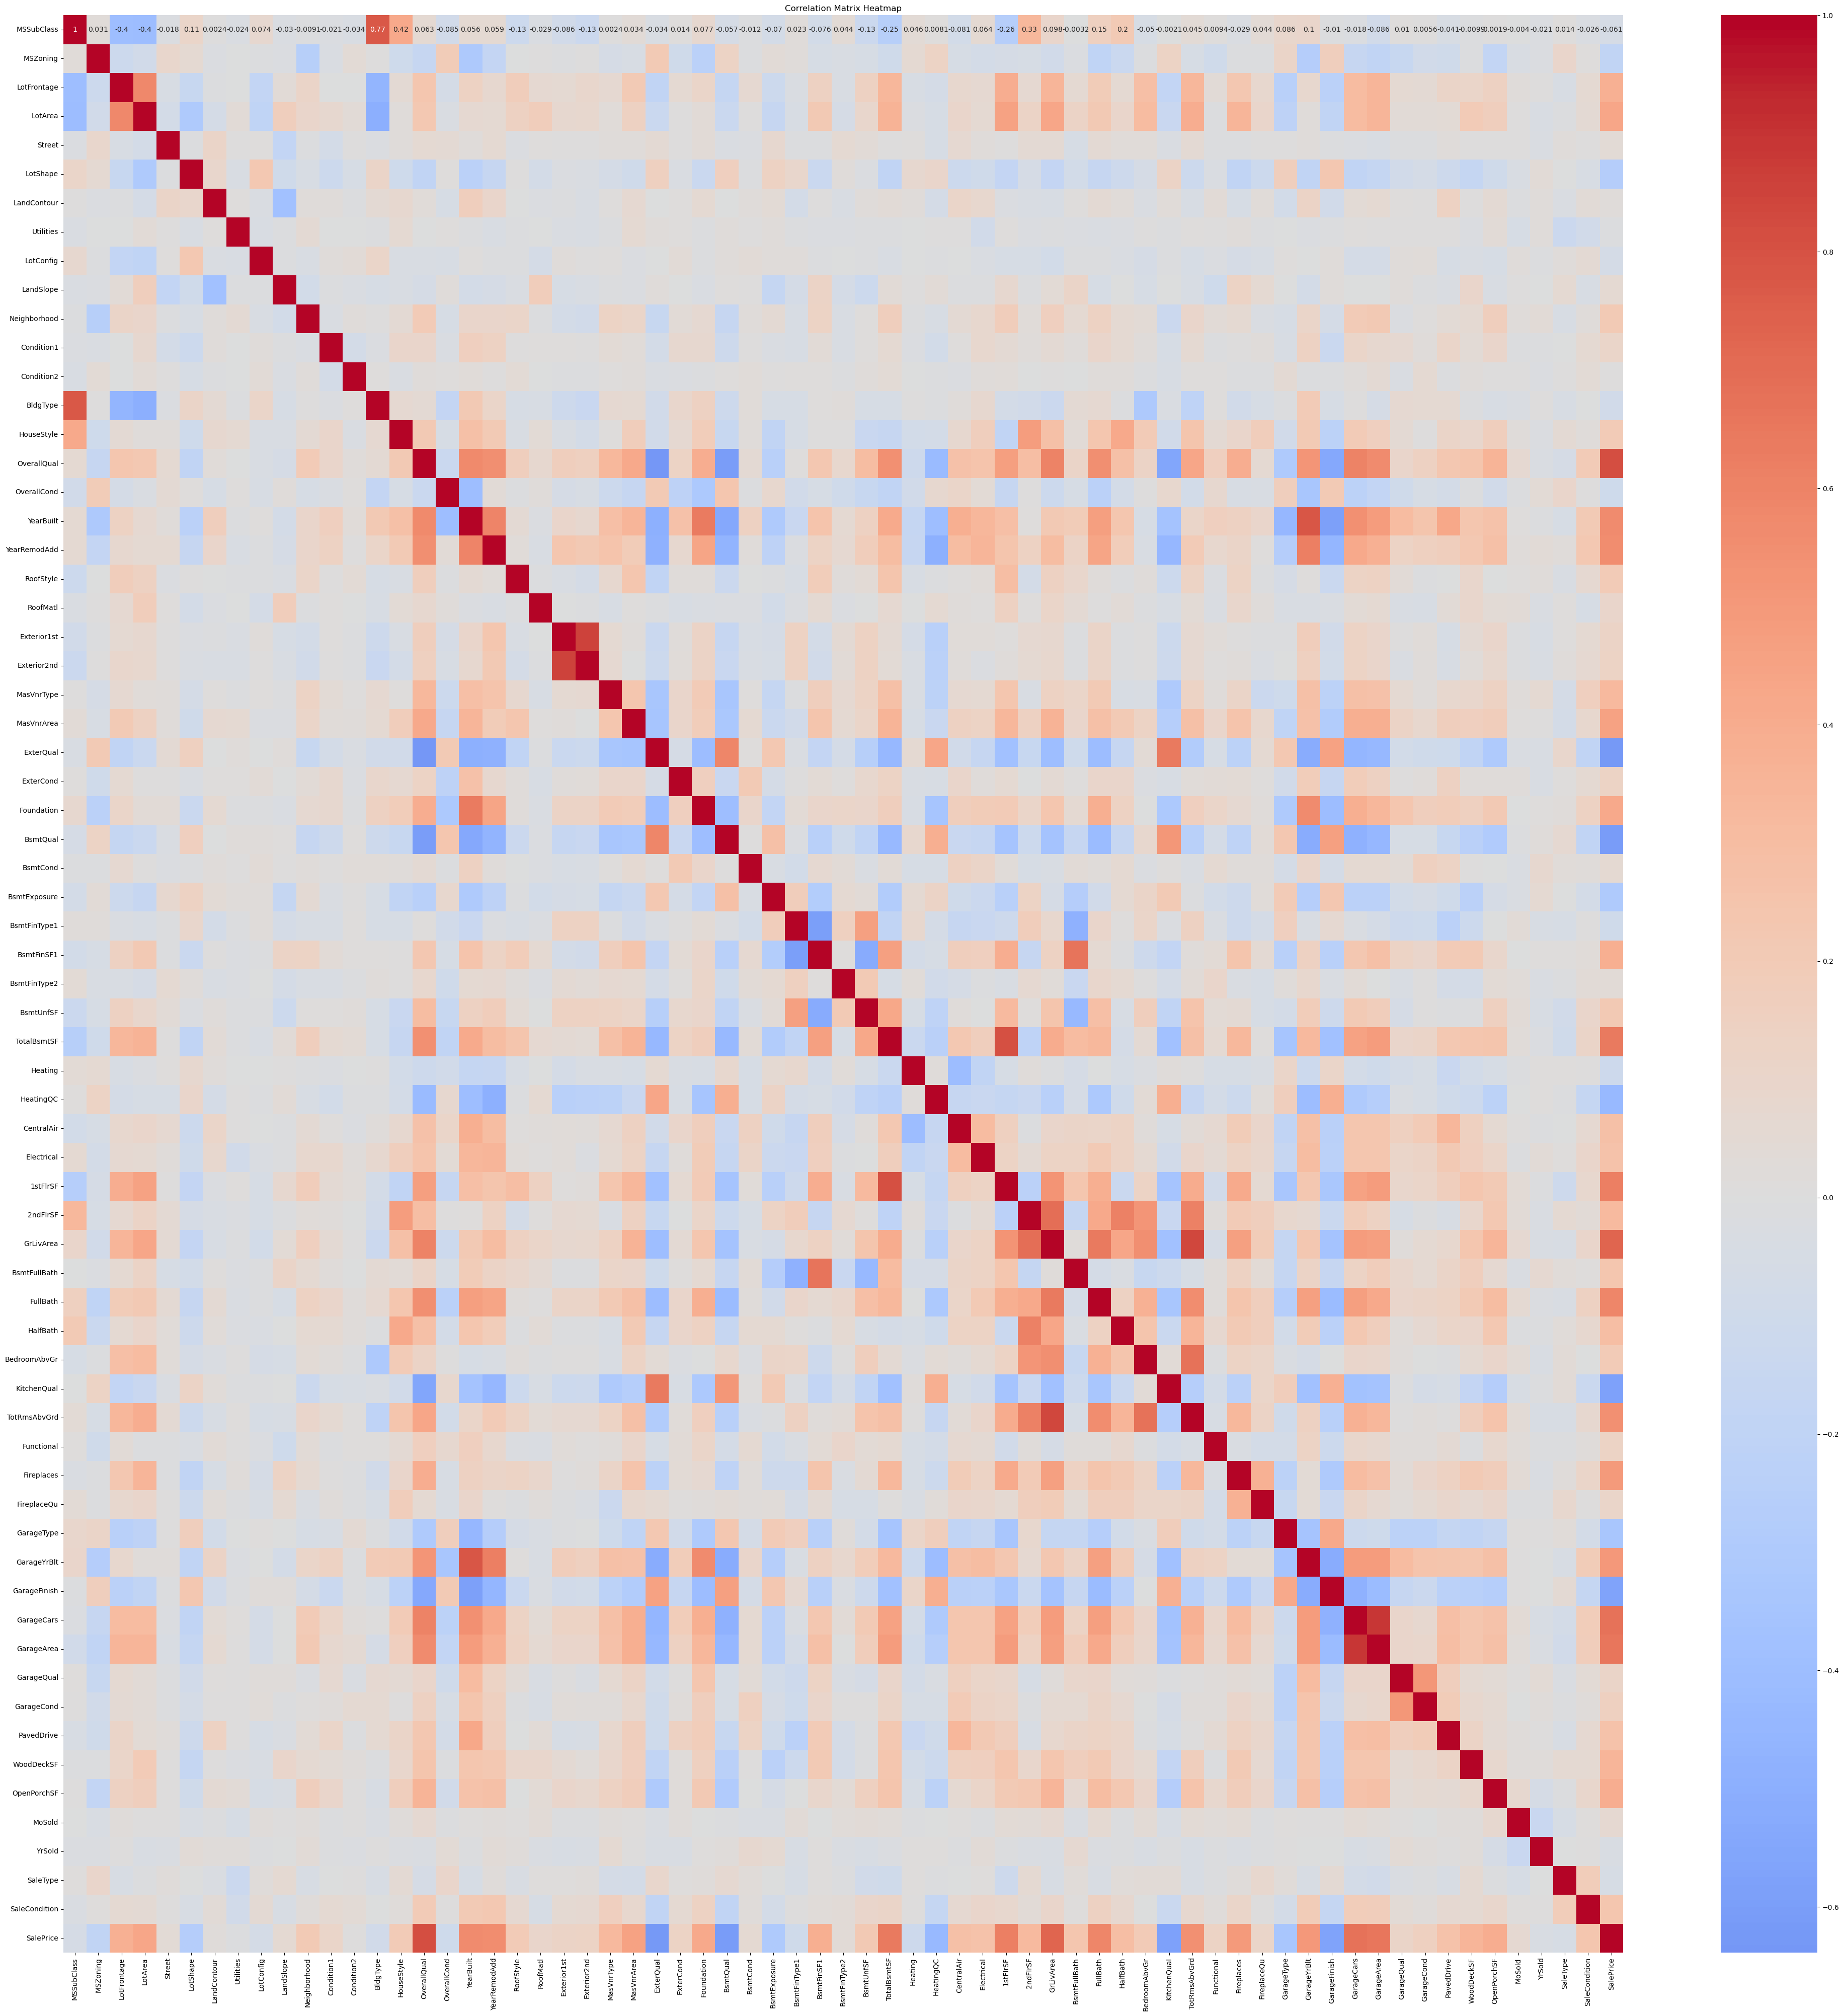

In [52]:
plt.figure(figsize=(50, 50))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Model Building

In [54]:
X = df1.drop(['SalePrice'], axis=1)
Y = df1['SalePrice']

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=20)

In [56]:
X_train.shape

(1168, 66)

In [57]:
X_test.shape

(292, 66)

**Scaling**

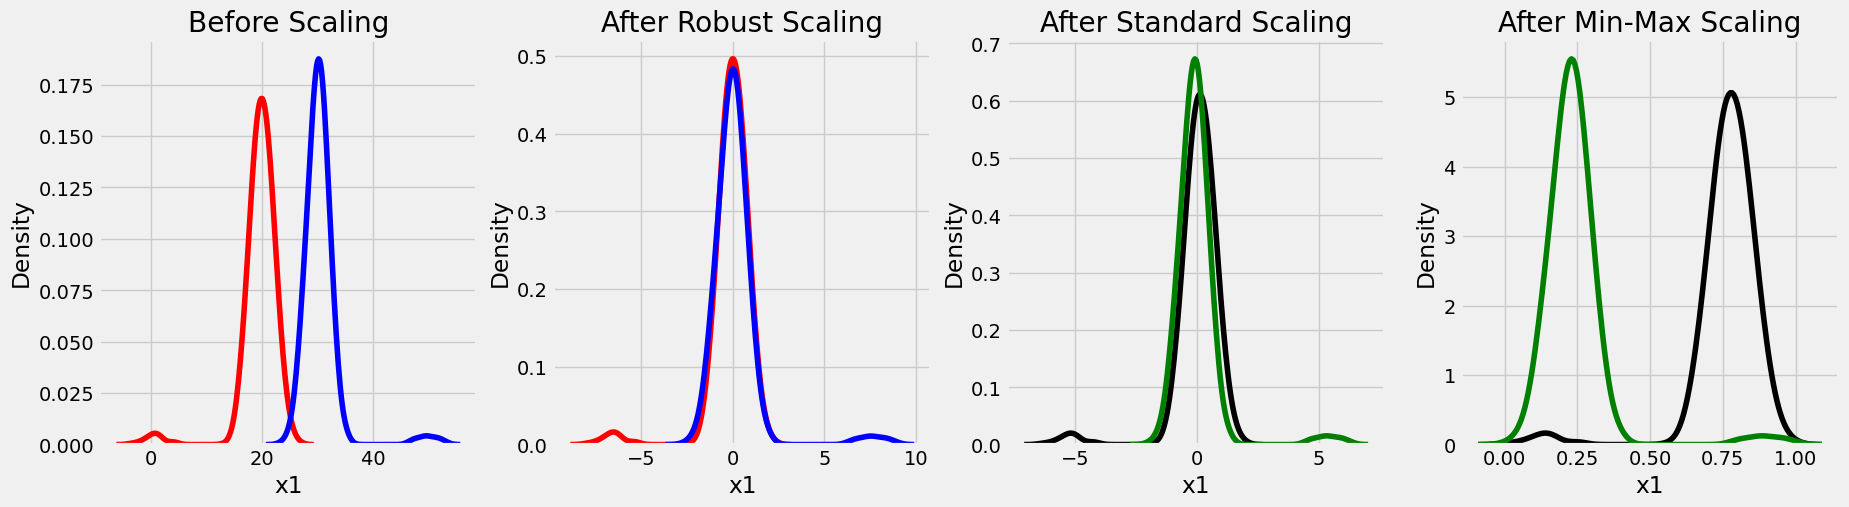

In [59]:
from sklearn import preprocessing  
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('fivethirtyeight')
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler #scaling
scaler=RobustScaler()
X_scaled=scaler.fit_transform(X)

In [61]:
X_scaled

array([[ 0.2       ,  0.        , -0.26578728, ...,  0.        ,
         0.        ,  0.        ],
       [-0.6       ,  0.        ,  0.5236864 , ..., -0.5       ,
         0.        ,  0.        ],
       [ 0.2       ,  0.        , -0.10789255, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.4       ,  0.        , -0.2131557 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.6       ,  0.        , -0.10789255, ...,  1.        ,
         0.        ,  0.        ],
       [-0.6       ,  0.        ,  0.26052851, ...,  0.        ,
         0.        ,  0.        ]])

In [62]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [63]:
X_scaled.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0         0.2       0.0    -0.265787 -0.254076     0.0       0.0          0.0   
1        -0.6       0.0     0.523686  0.030015     0.0       0.0          0.0   
2         0.2       0.0    -0.107893  0.437624     0.0      -1.0          0.0   
3         0.4       0.0    -0.528945  0.017663     0.0      -1.0          0.0   
4         0.2       0.0     0.734213  1.181201     0.0      -1.0          0.0   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0        0.0        0.0        0.0          -0.7         0.0         0.0   
1        0.0       -1.0        0.0           1.2        -1.0         0.0   
2        0.0        0.0        0.0          -0.7         0.0         0.0   
3        0.0       -2.0        0.0          -0.6         0.0         0.0   
4        0.0       -1.0        0.0           0.3         0.0         0.0   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       0.0         1.0          0.5          0.0   0.652174      0.243243   
1       0.0         0.0          0.0          2.5   0.065217     -0.486486   
2       0.0         1.0          0.5          0.0   0.608696      0.216216   
3       0.0         1.0          0.5          0.0  -1.260870     -0.648649   
4       0.0         1.0          1.0          0.0   0.586957      0.162162   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0        0.0       0.0         0.00          0.0         0.0    1.193303   
1        0.0       0.0        -1.00         -1.0         0.0    0.000000   
2        0.0       0.0         0.00          0.0         0.0    0.986301   
3        0.0       0.0         0.25          0.4         0.0    0.000000   
4        0.0       0.0         0.00          0.0         0.0    2.130898   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0       -1.0        0.0         1.0       0.0       0.0           0.0   
1        0.0        0.0         0.0       0.0       0.0          -2.0   
2       -1.0        0.0         1.0       0.0       0.0          -1.0   
3        0.0        0.0        -1.0       1.0      -2.0           0.0   
4       -1.0        0.0         1.0       0.0       0.0          -3.0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtUnfSF  TotalBsmtSF  Heating  \
0           0.0    0.452790           0.0  -0.559829    -0.269652      0.0   
1          -0.5    0.834679           0.0  -0.330769     0.538308      0.0   
2           0.0    0.143910           0.0  -0.074359    -0.142289      0.0   
3          -0.5   -0.235170           0.0   0.106838    -0.468657      0.0   
4           0.0    0.381186           0.0   0.021368     0.305473      0.0   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0        0.0         0.0         0.0 -0.453608  1.173077   0.380070   
1        0.0         0.0         0.0  0.343643  0.000000  -0.312090   
2        0.0         0.0         0.0 -0.327933  1.189560   0.497489   
3        0.5         0.0         0.0 -0.247423  1.038462   0.390885   
4        0.0         0.0         0.0  0.113893  1.446429   1.134029   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  \
0           1.0       0.0       1.0           0.0         -1.0           1.0   
1           0.0       0.0       0.0           0.0          0.0           0.0   
2           1.0       0.0       1.0           0.0         -1.0           0.0   
3           1.0      -1.0       0.0           0.0         -1.0           0.5   
4           1.0       0.0       1.0           1.0         -1.0           1.5   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
0         0.0        -1.0          0.0         0.0     0.628047           0.0   
1         0.0         0.0          2.0         0.0    -0.064261           0.0   
2         0.0         0.0          2.0         0.0     0.576765           

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.20,random_state=20)

In [66]:
X_train.shape

(1168, 66)

In [67]:
X_test.shape

(292, 66)

# Model Evaluation

In [69]:
import time
results = {
    'Algorithm': [],
    'Training Time': [],
    'training_mse': [],
    'training_mae': [],
    'training_r2':[],
    'testing_mse': [],
    'testing_mae': [],
    'testing_r2':[]
}

**LinearRegression**

In [71]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

start_time = time.time()
lr = LinearRegression()

# Train the model
lr.fit(X_train, Y_train)

# Predict on the training set
y_train_predict = lr.predict(X_train)
training_mse = mean_squared_error(Y_train, y_train_predict)
training_r2 = r2_score(Y_train, y_train_predict)
training_mae = mean_absolute_error(Y_train, y_train_predict)
print('Training mean squared error:', training_mse)
print('Training R2 score:', training_r2)
print('Training mean absolute error:', training_mae)

# Predict on the test set
y_test_predict = lr.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_predict)
test_r2 = r2_score(Y_test, y_test_predict)
test_mae = mean_absolute_error(Y_test, y_test_predict)
print('\nTest mean squared error:', test_mse)
print('Test R2 score:', test_r2)
print('Test mean absolute error:', test_mae)
end_time = time.time()
training_time= end_time - start_time

#adding the values
results['Algorithm'].append('Linear Regression')
results['Training Time'].append(training_time)
results['training_mse'].append(training_mse)
results['training_r2'].append(training_r2)
results['training_mae'].append(training_mae)
results['testing_mse'].append(test_mse)
results['testing_mae'].append(test_mae)
results['testing_r2'].append(test_r2)

Training mean squared error: 469352489.2167923
Training R2 score: 0.898472570415542
Training mean absolute error: 15116.230057393544

Test mean squared error: 417370036.0280327
Test R2 score: 0.8976013575143309
Test mean absolute error: 15564.965951265116


**Types of regularized linear regression: ElasticNet, Lasso and Ridge**

In [73]:
from sklearn.linear_model import ElasticNet
start_time = time.time()
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.9) 
elastic_net.fit(X_train, Y_train)

y_train_predict = elastic_net.predict(X_train)
training_mse = mean_squared_error(Y_train, y_train_predict)
training_r2 = r2_score(Y_train, y_train_predict)
training_mae = mean_absolute_error(Y_train, y_train_predict)
print('Training mean squared error: ', training_mse)
print('Training R2 score:', training_r2)
print('Training mean absolute error: ', training_mae)


y_test_predict = elastic_net.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_predict)
test_r2 = r2_score(Y_test, y_test_predict)
test_mae = mean_absolute_error(Y_test, y_test_predict)
print('\nTest mean squared error:', test_mse)
print('Test R2 score: ', test_r2)
print('Test mean absolute error:', test_mae)
end_time = time.time()
training_time= end_time - start_time

#adding the values
results['Algorithm'].append('elastic net')
results['Training Time'].append(training_time)
results['training_mse'].append(training_mse)
results['training_r2'].append(training_r2)
results['training_mae'].append(training_mae)
results['testing_mse'].append(test_mse)
results['testing_mae'].append(test_mae)
results['testing_r2'].append(test_r2)

Training mean squared error:  475902636.84490275
Training R2 score: 0.8970556829645123
Training mean absolute error:  15028.147454306827

Test mean squared error: 413436048.4479272
Test R2 score:  0.8985665321866478
Test mean absolute error: 15375.855016153933


In [74]:
from sklearn.linear_model import Lasso
start_time = time.time()
lasso = Lasso(alpha=1.0) 

lasso.fit(X_train, Y_train)

y_train_predict = lasso.predict(X_train)
training_mse = mean_squared_error(Y_train, y_train_predict)
training_r2 = r2_score(Y_train, y_train_predict)
training_mae = mean_absolute_error(Y_train, y_train_predict)
print('Training mean squared error: ', training_mse)
print('Training R2 score: ', training_r2)
print('Training mean absolute error: ', training_mae)

y_test_predict = lasso.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_predict)
test_r2 = r2_score(Y_test, y_test_predict)
test_mae = mean_absolute_error(Y_test, y_test_predict)
print('\nTest mean squared error: ', test_mse)
print('Test R2 score: ', test_r2)
print('Test mean absolute error: ', test_mae)
end_time = time.time()
training_time= end_time - start_time

#adding the values
results['Algorithm'].append('Lasso')
results['Training Time'].append(training_time)
results['training_mse'].append(training_mse)
results['training_r2'].append(training_r2)
results['training_mae'].append(training_mae)
results['testing_mse'].append(test_mse)
results['testing_mae'].append(test_mae)
results['testing_r2'].append(test_r2)

Training mean squared error:  469355221.8606406
Training R2 score:  0.898471979306914
Training mean absolute error:  15114.848127108153

Test mean squared error:  417132149.16940075
Test R2 score:  0.8976597212905638
Test mean absolute error:  15557.189771746196


In [75]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
start_time = time.time()
ridge = Ridge(alpha=1.0) 

ridge.fit(X_train, Y_train)

y_train_predict = ridge.predict(X_train)
training_mse = mean_squared_error(Y_train, y_train_predict)
training_r2 = r2_score(Y_train, y_train_predict)
training_mae = mean_absolute_error(Y_train, y_train_predict)
print('Training mean squared error: ', training_mse)
print('Training R2 score: ', training_r2)
print('Training mean absolute error: ', training_mae)

y_test_predict = ridge.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_predict)
test_r2 = r2_score(Y_test, y_test_predict)
test_mae = mean_absolute_error(Y_test, y_test_predict)
print('\nTest mean squared error: ', test_mse)
print('Test R2 score: ', test_r2)
print('Test mean absolute error: ', test_mae)
end_time = time.time()
training_time= end_time - start_time

#adding the values
results['Algorithm'].append('ridge')
results['Training Time'].append(training_time)
results['training_mse'].append(training_mse)
results['training_r2'].append(training_r2)
results['training_mae'].append(training_mae)
results['testing_mse'].append(test_mse)
results['testing_mae'].append(test_mae)
results['testing_r2'].append(test_r2)

Training mean squared error:  469701912.2802296
Training R2 score:  0.8983969853781055
Training mean absolute error:  15104.333802485287

Test mean squared error:  416415821.77678657
Test R2 score:  0.8978354669029635
Test mean absolute error:  15506.22728479276


**Decision Tree Regressor**

In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
start_time = time.time()
dt = DecisionTreeRegressor(max_depth=4, min_samples_split=4)

dt.fit(X_train, Y_train)

y_train_predict = dt.predict(X_train)
training_mse = mean_squared_error(Y_train, y_train_predict)
training_mae = mean_absolute_error(Y_train, y_train_predict)
training_r2 = r2_score(Y_train, y_train_predict)
print('Training mean squared error: ', training_mse)
print('Training mean absolute error: ', training_mae)
print('Training R2 score: ', training_r2)


y_test_predict = dt.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_predict)
test_mae = mean_absolute_error(Y_test, y_test_predict)
test_r2 = r2_score(Y_test, y_test_predict)
print('\nTest mean squared error: ', test_mse)
print('Test mean absolute error: ', test_mae)
print('Test R2 score: ', test_r2)
end_time = time.time()
training_time= end_time - start_time

#adding the values
results['Algorithm'].append('Decision Tree Regressor')
results['Training Time'].append(training_time)
results['training_mse'].append(training_mse)
results['training_r2'].append(training_r2)
results['training_mae'].append(training_mae)
results['testing_mse'].append(test_mse)
results['testing_mae'].append(test_mae)
results['testing_r2'].append(test_r2)

Training mean squared error:  821701351.1163073
Training mean absolute error:  21507.908072949944
Training R2 score:  0.8222546423390095

Test mean squared error:  947310627.9005826
Test mean absolute error:  23522.35978849776
Test R2 score:  0.767584364147427


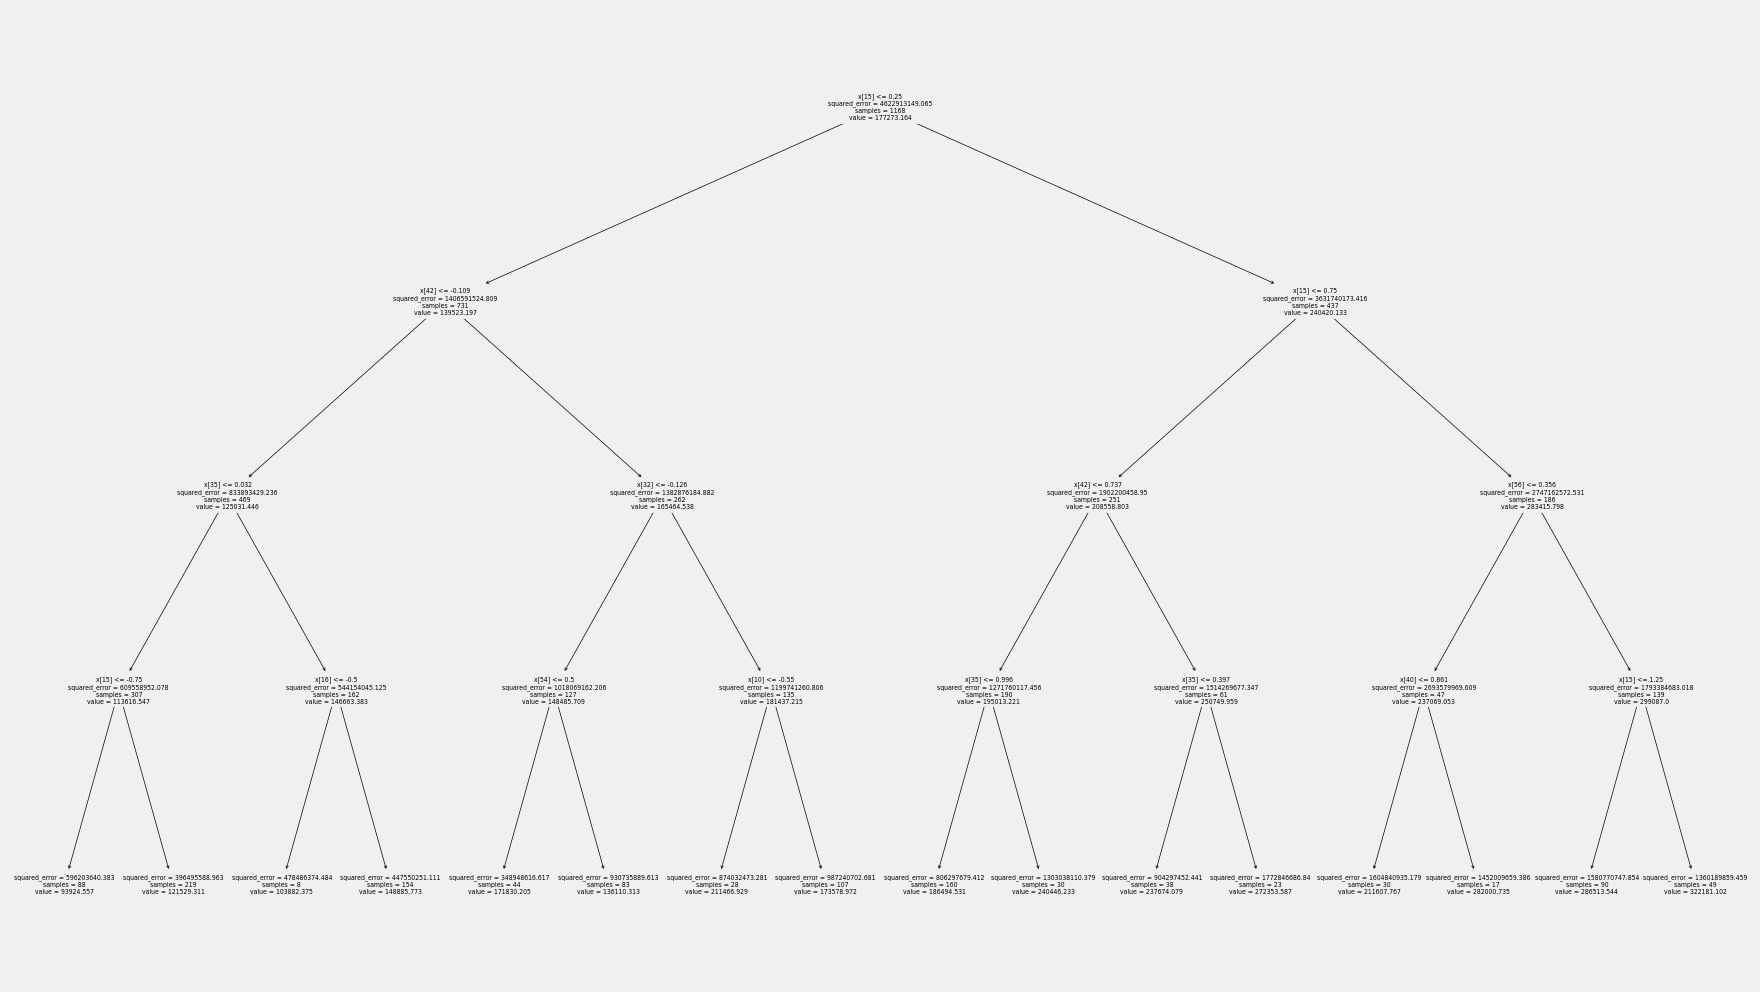

In [78]:
from sklearn import tree
plt.figure(figsize=(20,12))
tree.plot_tree(dt)
plt.show()

**K Neighbours Regression**

In [80]:
from sklearn.neighbors import KNeighborsRegressor

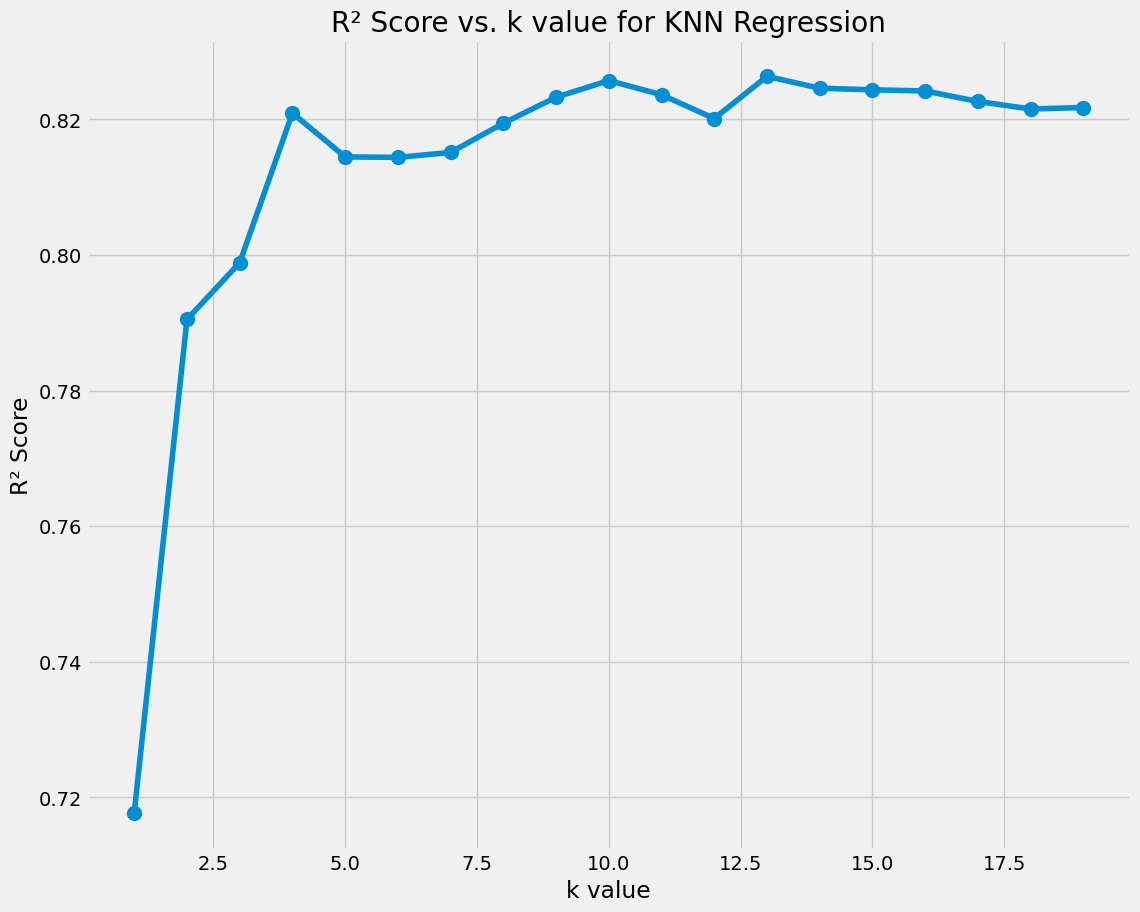

In [81]:
best_r2 = []  

for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    
    r2 = r2_score(Y_test, y_pred)
    best_r2.append(r2)

plt.figure(figsize=(12, 10))
plt.plot(range(1, 20), best_r2, marker="o", markersize=10)
plt.ylabel("R² Score")
plt.xlabel("k value")
plt.title("R² Score vs. k value for KNN Regression")
plt.show()

In [82]:
knn=KNeighborsRegressor(n_neighbors=13)

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
start_time = time.time()
knn.fit(X_train,Y_train)
Y_pred_train=knn.predict(X_train)

training_mse = mean_squared_error(Y_train, Y_pred_train)
print("Mean Squared Error (MSE) of train is:", training_mse)
training_mae = mean_absolute_error(Y_train, Y_pred_train)
print("Mean Absolute Error (MAE) of train is:", training_mae)
training_r2 = r2_score(Y_train, Y_pred_train)
print("R-squared (R²) of train is:", training_r2)

Y_pred_test=knn.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_pred_test)
print("\nMean Squared Error (MSE) of test is:", test_mse)
test_mae = mean_absolute_error(Y_test, Y_pred_test)
print("Mean Absolute Error (MAE) of test is:", test_mae)
test_r2 = r2_score(Y_test, Y_pred_test)
print("R-squared (R²) of test is:", test_r2)
end_time = time.time()
training_time= end_time - start_time

#adding the values
results['Algorithm'].append('K  Neighbors Regressor')
results['Training Time'].append(training_time)
results['training_mse'].append(training_mse)
results['training_r2'].append(training_r2)
results['training_mae'].append(training_mae)
results['testing_mse'].append(test_mse)
results['testing_mae'].append(test_mae)
results['testing_r2'].append(test_r2)


Mean Squared Error (MSE) of train is: 775253636.264128
Mean Absolute Error (MAE) of train is: 19405.30265410959
R-squared (R²) of train is: 0.8323019249407971

Mean Squared Error (MSE) of test is: 707803903.7051855
Mean Absolute Error (MAE) of test is: 19430.00632244468
R-squared (R²) of test is: 0.8263455623810037


**RandomForestRegressor**

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
start_time = time.time()
rf = RandomForestRegressor(n_estimators=900, random_state=70)

rf.fit(X_train, Y_train)

Y_pred_train=rf.predict(X_train)
Y_pred_train
training_mse = mean_squared_error(Y_train, Y_pred_train)
print("Mean Squared Error (MSE) of train is:", training_mse)
training_mae = mean_absolute_error(Y_train, Y_pred_train)
print("Mean Absolute Error (MAE) of train is:", training_mae)
training_r2 = r2_score(Y_train, Y_pred_train)
print("R-squared (R²) of train is:", training_r2)

y_predict = rf.predict(X_test)

test_mse = mean_squared_error(Y_test, y_predict)
print('\nMean Squared Error (MSE) of Random Forest Regressor is:', test_mse)
test_mae = mean_absolute_error(Y_test, y_predict)
print('Mean Absolute Error (MAE) of Random Forest Regressor is:', test_mae)
test_r2 = r2_score(Y_test, y_predict)
print('R-squared (R²) of Random Forest Regressor is:', test_r2)
end_time = time.time()
training_time= end_time - start_time

#adding the values
results['Algorithm'].append('Random Forest Regressor')
results['Training Time'].append(training_time)
results['training_mse'].append(training_mse)
results['training_r2'].append(training_r2)
results['training_mae'].append(training_mae)
results['testing_mse'].append(test_mse)
results['testing_mae'].append(test_mae)
results['testing_r2'].append(test_r2)

Mean Squared Error (MSE) of train is: 69347792.7390276
Mean Absolute Error (MAE) of train is: 5801.400380993151
R-squared (R²) of train is: 0.9849991140860933

Mean Squared Error (MSE) of Random Forest Regressor is: 413028290.7730775
Mean Absolute Error (MAE) of Random Forest Regressor is: 14822.28316780822
R-squared (R²) of Random Forest Regressor is: 0.8986665725076184


# Comparison 

In [87]:
df_results = pd.DataFrame(results)
df_results

Algorithm  Training Time  training_mse  training_mae  \
0        Linear Regression       0.068868  4.693525e+08  15116.230057   
1              elastic net       0.045861  4.759026e+08  15028.147454   
2                    Lasso       0.057840  4.693552e+08  15114.848127   
3                    ridge       0.040490  4.697019e+08  15104.333802   
4  Decision Tree Regressor       0.032258  8.217014e+08  21507.908073   
5   K  Neighbors Regressor       0.215001  7.752536e+08  19405.302654   
6  Random Forest Regressor      33.461397  6.934779e+07   5801.400381   

   training_r2   testing_mse   testing_mae  testing_r2  
0     0.898473  4.173700e+08  15564.965951    0.897601  
1     0.897056  4.134360e+08  15375.855016    0.898567  
2     0.898472  4.171321e+08  15557.189772    0.897660  
3     0.898397  4.164158e+08  15506.227285    0.897835  
4     0.822255  9.473106e+08  23522.359788    0.767584  
5     0.832302  7.078039e+08  19430.006322    0.826346  
6     0.984999  4.130283e+08  14822.283168    0.898667

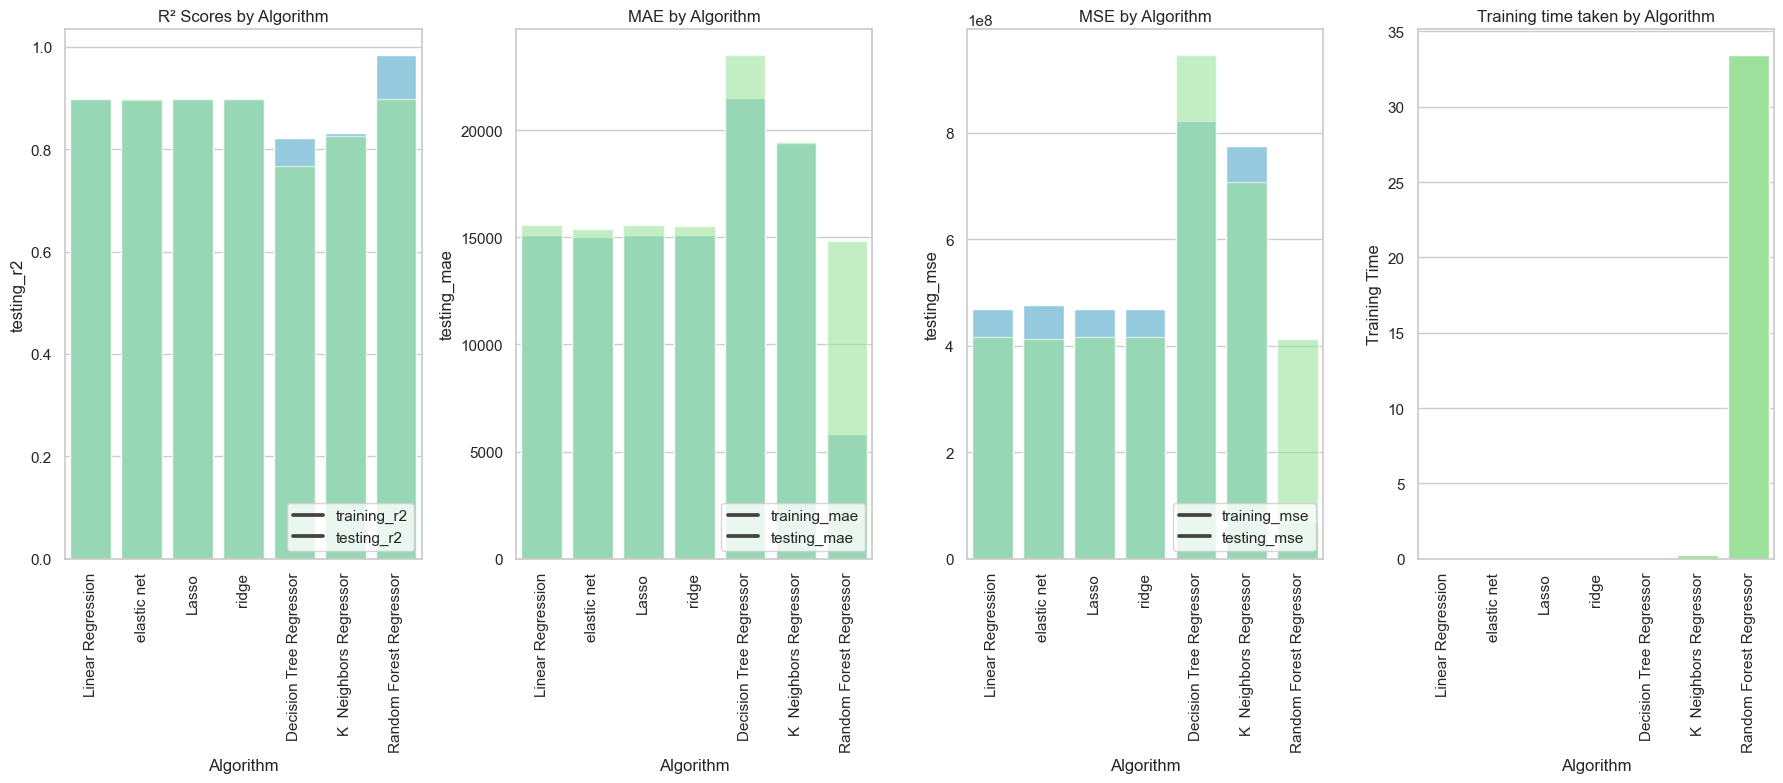

In [88]:

# Set up the plotting environment
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 4, figsize=(18, 8))  # Adjusted to 1 row and 3 columns

# Plot Training and Testing R²
sns.barplot(x='Algorithm', y='training_r2', data=df_results, ax=axs[0], color='skyblue')
sns.barplot(x='Algorithm', y='testing_r2', data=df_results, ax=axs[0], color='lightgreen', alpha=0.6)
axs[0].set_title('R² Scores by Algorithm')
axs[0].legend(['training_r2', 'testing_r2'], loc='lower right')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)  # Rotate x-axis labels for readability

# Plot Training and Testing MAE
sns.barplot(x='Algorithm', y='training_mae', data=df_results, ax=axs[1], color='skyblue')
sns.barplot(x='Algorithm', y='testing_mae', data=df_results, ax=axs[1], color='lightgreen', alpha=0.6)
axs[1].set_title('MAE by Algorithm')
axs[1].legend(['training_mae', 'testing_mae'], loc='lower right')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)

# Plot Training and Testing MSE
sns.barplot(x='Algorithm', y='training_mse', data=df_results, ax=axs[2], color='skyblue')
sns.barplot(x='Algorithm', y='testing_mse', data=df_results, ax=axs[2], color='lightgreen', alpha=0.6)
axs[2].set_title('MSE by Algorithm')
axs[2].legend(['training_mse', 'testing_mse'], loc='lower right')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)

sns.barplot(x='Algorithm', y='Training Time', data=df_results, ax=axs[3], color='lightgreen')
axs[3].set_title('Training time taken by Algorithm')
axs[3].set_xticklabels(axs[2].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()


# Although the Random Forest Regressor took the most time, it still delivered the best results.